In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix


In [3]:
# data cleansing to resemble original data
# read in data
df = pd.read_csv('~/Downloads/all_samples_df_split.csv')
antibody_map = pd.read_csv("~/Downloads/antibodies.csv")
antibody_map = antibody_map.drop(["Supplier", "Clone"], axis=1)
# antibody_map
antibody_map = antibody_map.T
antibody_map.columns = antibody_map.iloc[0]
antibody_map.drop(["Isotope_name"], inplace=True)
df = df.T
df.to_csv("data.csv")
df.columns = df.iloc[0]

# convert antibody map to dictionary
antibody_map = antibody_map.to_dict()

df.drop([col for col in df.columns if col[:-2] not in antibody_map.keys()], inplace=True, axis=1)
df = df.tail(-1)
# antibody_map
new_amap = {}
for a in antibody_map.keys():
    new_amap[a+"Di"] = antibody_map[a]["Target"]


df.rename(columns=new_amap, inplace=True)



# display(df)
# df["garb"] = df.index.str.split("_")

df["time"] = df.apply(lambda x: x.name.split("_")[4] if "full" not in x else 0, axis=1)
df["treatment"] = df.apply(lambda x: x.name.split("_")[5] if "full" not in x else "full", axis=1)
df["line_replicate"] = df.apply(lambda x: x.name.split("_")[3] if "full" not in x else 0, axis=1)
df["group_replicate"] = df.apply(lambda x: x.name.split("_")[-1] if "full" not in x else 0, axis=1)
df["cell_line"] = df.apply(lambda x: x.name.split("_")[2] if "full" not in x else 0, axis=1)
# df = df.set_index("cell_line")
# df["time"] = df["garb"].str[4]
# df["cell_line"] = df["garb"].str[2]
# df["treatment"] = df["garb"].str[5]
# df["line_replicate"] = df["garb"].str[3]
# df["group_replicate"] = df["garb"].str[-1]
# df.drop(["garb"], inplace=True, axis=1)
# df.set_index("cell_line", inplace=True)
# df[df["treatment"] == "singlets"]
df

Unnamed: 0,p-CREB,p-STAT5,p-SRC,p-FAK,p-MEK1/2,p-MAPKAPK-2,p-S6K,p-MAP2K3,p-p53,p-p38,...,cleaved PARP,p-SEK/MKK4,p-AKT(308),p-RB,p-4EBP1,time,treatment,line_replicate,group_replicate,cell_line
_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_0,0.824983,0.5322,0.707121,0.731541,1.14305,1.301338,0.957611,0.903466,0.136502,1.263923,...,0.529747,1.327591,0.844781,0.202218,4.358261,0,iPI3K,A,0,UACC3199
_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_1,0.840151,0.534071,0.736054,0.784885,1.152455,1.378498,0.98322,0.889017,0.129305,1.245357,...,0.452981,1.237847,0.836084,0.239622,4.252528,0,iPI3K,A,1,UACC3199
_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_2,0.834967,0.550929,0.717474,0.757345,1.167884,1.307103,1.010026,0.963742,0.134937,1.358789,...,0.372559,1.316039,0.846569,0.218796,4.542695,0,iPI3K,A,2,UACC3199
_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_3,0.818263,0.548926,0.720759,0.774161,1.151806,1.30378,0.991744,0.910924,0.132637,1.282928,...,0.521082,1.248718,0.844495,0.205489,4.370965,0,iPI3K,A,3,UACC3199
_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_4,0.833942,0.537725,0.725243,0.751584,1.160927,1.323948,0.992557,0.944491,0.132166,1.308176,...,0.411614,1.308411,0.843811,0.224665,4.370865,0,iPI3K,A,4,UACC3199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_d535_CAL851_B_17_iMEK_singlets_iMEK.fcs.fcs_0,1.115155,0.889687,0.445894,1.232972,1.586157,2.294963,0.968282,0.775482,0.158342,1.971513,...,0.286397,1.399559,0.742314,0.23855,0.790792,17,iMEK,B,0,CAL851
_d535_CAL851_B_17_iMEK_singlets_iMEK.fcs.fcs_1,1.168257,0.90624,0.468452,1.222557,1.582634,2.248648,0.928785,0.756713,0.157844,2.009905,...,0.323777,1.332455,0.721059,0.199334,0.8709,17,iMEK,B,1,CAL851
_d535_CAL851_B_17_iMEK_singlets_iMEK.fcs.fcs_2,1.079534,0.897891,0.481913,1.225248,1.585978,2.338057,0.942843,0.788043,0.186059,2.0722,...,0.784006,1.431382,0.724166,0.286999,0.899924,17,iMEK,B,2,CAL851
_d535_CAL851_B_17_iMEK_singlets_iMEK.fcs.fcs_3,1.10867,0.904691,0.464698,1.238925,1.5996,2.36616,0.944501,0.777213,0.16462,2.010927,...,0.248272,1.353732,0.773726,0.321974,0.770851,17,iMEK,B,3,CAL851


In [4]:
# # read data
# # import pandas as pd
# df = pd.read_csv("./first.csv")
# # pivot dataframe
# df = pd.pivot_table(df, index=["cell_line", "treatment", "time"], columns=["reporter"], values="value")
# # df[df.index == "184A1"]
# df = df.reset_index()
# df.set_index("cell_line")

# display(df)

# display(df)
# display(df.filter(regex="184A1", axis=0))
# display(df[df.cell_line== "184A1"])
# filter data and clean to prepare it for Support Vector Machine
df_copy = df
new_df = df[df["treatment"] == "full"]
types_df = pd.read_csv("subtypes.csv")


full_dataframe = new_df.set_index("cell_line").join(types_df.set_index("Cell line"))


luminal_cells = full_dataframe[full_dataframe["Type"] == "L"].fillna(0)
basal_cells = full_dataframe[full_dataframe["Type"] == "B"].fillna(0)
normal_cells = full_dataframe[full_dataframe["Type"] == "Normal"].fillna(0)
luminal_cell_names = luminal_cells.index
basal_cell_names = basal_cells.index
normal_cell_names = normal_cells.index
luminal_copy = luminal_cells
basal_copy = basal_cells
normal_copy = normal_cells
# set up data for training
drop_lst = ["line_replicate", "treatment", "time", "group_replicate"]
drop_lst += ["Type", "ER", "PR", "HER2", "PI3K", "p53", "RAS"]


luminal_cells = luminal_cells.reset_index().drop(drop_lst, axis=1)
luminal_cells.set_index("index", inplace=True)
basal_cells = basal_cells.reset_index().drop(drop_lst,axis=1)
basal_cells.set_index("index", inplace=True)
normal_cells = normal_cells.reset_index().drop(drop_lst, axis=1)
normal_cells.set_index("index", inplace=True)


svm_data_bin = pd.concat([luminal_cells, basal_cells])

svm_data_bin = svm_data_bin.reset_index()
svm_data_bin = svm_data_bin.fillna(0)
svm_data_bin = svm_data_bin.drop("index", axis=1)


# LUMINAL = 0, BASAL = 1
svm_labels_bin = list(np.zeros(len(luminal_cells))) + list(np.ones(len(basal_cells)))
luminal_centroid = luminal_cells.transpose().mean(axis=1)
basal_centroid = basal_cells.transpose().mean(axis=1)
normal_centroid = normal_cells.transpose().mean(axis=1)

luminal_cells

all_labels = list(types_df["Cell line"])

full_sample_names = list(df[df["treatment"] == "full"]["cell_line"])



/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


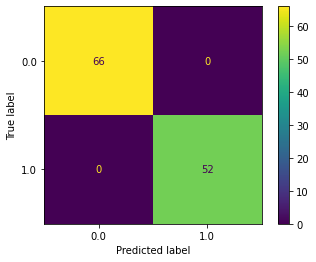

In [5]:
# train Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC
svc = SVC(kernel="linear", C=100)
svc.fit(svm_data_bin, svm_labels_bin)
plot_confusion_matrix(svc,svm_data_bin,svm_labels_bin)

In [6]:
# Calculate State Transition Vector and Normal to Hyperplane
from scipy import linalg
from math import degrees
hyperplane_normal_lb = svc.coef_[0]/linalg.norm(svc.coef_[0])
print(svc.coef_[0])

# distance between luminal and basal centroids (cSTAR eq. 1) -> STV
state_vec_lb = (basal_centroid - luminal_centroid)/linalg.norm(luminal_centroid - basal_centroid)
norm_stv_df = pd.DataFrame(state_vec_lb,index=svm_data_bin.columns,columns=['STV_LB'])
norm_stv_df.insert(0,'Norm_LB', hyperplane_normal_lb)
# norm_stv_df.sort_values(by='STV_LB').to_csv('STV_Luminal_Basal.csv')
norm_stv_df.sort_values(by='STV_LB', ascending=False).to_csv('STV_Luminal_Basal.csv')

[ 2.74823041e+00 -9.80380816e+00  2.85594625e+00  2.05251127e+00
 -1.09517697e+00 -1.73222572e+00 -5.52816197e+00 -1.30506582e+00
  6.26549210e-01  3.99040779e+00  3.67285464e-01  1.73651538e+00
 -1.43947979e+00 -8.35908476e-01  1.34936552e+00 -2.35626117e+00
 -6.46253836e+00  1.07152984e+00  7.28884710e+00 -8.67912268e+00
  3.66081051e+00 -2.62428877e+00  1.20532854e+00  2.75546669e-01
  2.68711206e+00  1.14279085e+00  1.45748694e+00 -2.04689788e-01
  6.21569193e-03]


In [7]:
df = df.reset_index()
df["cell_line"] += "_" + df["time"].astype(str) + "_" + df["treatment"] + "_" + df["line_replicate"]
df = df.set_index("cell_line")
df = df.fillna(0)
types_df = types_df.set_index("Cell line")
types_df
df

Unnamed: 0,index,p-CREB,p-STAT5,p-SRC,p-FAK,p-MEK1/2,p-MAPKAPK-2,p-S6K,p-MAP2K3,p-p53,...,p-S6,cleaved PARP,p-SEK/MKK4,p-AKT(308),p-RB,p-4EBP1,time,treatment,line_replicate,group_replicate
cell_line,,,,,,,,,,,,,,,,,,,,,
UACC3199_0_iPI3K_A,_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_0,0.824983,0.532200,0.707121,0.731541,1.143050,1.301338,0.957611,0.903466,0.136502,...,1.387186,0.529747,1.327591,0.844781,0.202218,4.358261,0,iPI3K,A,0
UACC3199_0_iPI3K_A,_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_1,0.840151,0.534071,0.736054,0.784885,1.152455,1.378498,0.983220,0.889017,0.129305,...,1.535126,0.452981,1.237847,0.836084,0.239622,4.252528,0,iPI3K,A,1
UACC3199_0_iPI3K_A,_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_2,0.834967,0.550929,0.717474,0.757345,1.167884,1.307103,1.010026,0.963742,0.134937,...,1.472265,0.372559,1.316039,0.846569,0.218796,4.542695,0,iPI3K,A,2
UACC3199_0_iPI3K_A,_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_3,0.818263,0.548926,0.720759,0.774161,1.151806,1.303780,0.991744,0.910924,0.132637,...,1.394050,0.521082,1.248718,0.844495,0.205489,4.370965,0,iPI3K,A,3
UACC3199_0_iPI3K_A,_e146_UACC3199_A_0_iPI3K_singlets_iPI3K.fcs.fcs_4,0.833942,0.537725,0.725243,0.751584,1.160927,1.323948,0.992557,0.944491,0.132166,...,1.486167,0.411614,1.308411,0.843811,0.224665,4.370865,0,iPI3K,A,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAL851_17_iMEK_B,_d535_CAL851_B_17_iMEK_singlets_iMEK.fcs.fcs_0,1.115155,0.889687,0.445894,1.232972,1.586157,2.294963,0.968282,0.775482,0.158342,...,6.620188,0.286397,1.399559,0.742314,0.238550,0.790792,17,iMEK,B,0
CAL851_17_iMEK_B,_d535_CAL851_B_17_iMEK_singlets_iMEK.fcs.fcs_1,1.168257,0.906240,0.468452,1.222557,1.582634,2.248648,0.928785,0.756713,0.157844,...,6.487308,0.323777,1.332455,0.721059,0.199334,0.870900,17,iMEK,B,1
CAL851_17_iMEK_B,_d535_CAL851_B_17_iMEK_singlets_iMEK.fcs.fcs_2,1.079534,0.897891,0.481913,1.225248,1.585978,2.338057,0.942843,0.788043,0.186059,...,6.700523,0.784006,1.431382,0.724166,0.286999,0.899924,17,iMEK,B,2


In [8]:
import statistics
# make intercept negative since we wish to get it on "the other side"
H_CONST_LB = - svc.intercept_[0]/linalg.norm(svc.coef_[0])
n = norm_stv_df['Norm_LB']
s = norm_stv_df["STV_LB"]

df = df.drop(["index", "treatment", "time"], axis=1)

def extract_cell_line(sample):
    return sample[:sample.index("_")]

def calculate_dpd(row,dataframe, h, s_vec, n_vec):
    smpl = row.name
    DPD_val = - (h - np.dot(dataframe.loc[smpl],n_vec))/np.dot(n_vec,s_vec)
    return DPD_val

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


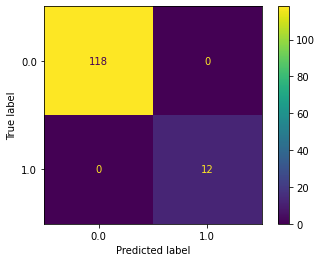

In [9]:
svc_canc = SVC(kernel='linear',C=100)

svc_canc.fit(pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.zeros(len(luminal_cells))) + list(np.zeros(len(basal_cells))) + list(np.ones(len(normal_cells))))
# b_coeff_canc = svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])
hyperplane_normal_canc = svc_canc.coef_[0]/linalg.norm(svc_canc.coef_[0])
canc_centroid = (basal_centroid + luminal_centroid)/2
state_vec_canc = pd.DataFrame((canc_centroid - normal_centroid)/linalg.norm(canc_centroid - normal_centroid), columns=["STV_Canc"])
plot_confusion_matrix(svc_canc,pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.zeros(len(luminal_cells))) + list(np.zeros(len(basal_cells))) + list(np.ones(len(normal_cells))))

In [10]:
composite_vec = pd.concat([norm_stv_df, state_vec_canc], axis=1)
composite_vec.insert(2, "Norm_Canc", hyperplane_normal_canc)
composite_vec

,Norm_LB,STV_LB,Norm_Canc,STV_Canc
p-CREB,0.139884,-0.008863,-0.175351,0.108449
p-STAT5,-0.499009,-0.001822,0.114046,0.035538
p-SRC,0.145366,0.042110,0.056690,0.026492
p-FAK,0.104472,0.102115,-0.157987,0.103127
p-MEK1/2,-0.055744,-0.065127,0.283578,-0.031787
p-MAPKAPK-2,-0.088169,0.084829,0.123414,0.097629
p-S6K,-0.281381,-0.013056,0.004823,0.021781
p-MAP2K3,-0.066427,-0.009376,-0.013679,0.038787
p-p53,0.031891,-0.004283,-0.042949,0.099254
p-p38,0.203110,0.109057,-0.014080,0.030387


In [11]:
H_CONST_CANC = - svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])
composite_dpd = pd.DataFrame(np.zeros((len(df.T.columns),2)),index=df.T.columns,columns=['DPD_Canc','DPD_LB'])
s_canc = composite_vec["STV_Canc"]
norm_canc = composite_vec["Norm_Canc"]
s_lb = composite_vec["STV_LB"]
norm_lb = composite_vec["Norm_LB"]
df_updated = df
df_updated = df.drop(["line_replicate", "group_replicate"], axis=1)
# len(df_updated.columns)

display(df_updated)
composite_dpd["DPD_Canc"] = df_updated.apply(calculate_dpd, args=(df_updated, H_CONST_CANC, s_canc, norm_canc), axis=1)
composite_dpd["DPD_LB"] = df_updated.apply(calculate_dpd, args=(df_updated, H_CONST_LB, s_lb, norm_lb), axis=1)

composite_dpd_full = composite_dpd.filter(regex="_full", axis=0)
composite_dpd_full["real_col"] = composite_dpd_full.index.str[:-9]
composite_dpd_full = composite_dpd_full.set_index("real_col")
composite_dpd_full

Unnamed: 0,p-CREB,p-STAT5,p-SRC,p-FAK,p-MEK1/2,p-MAPKAPK-2,p-S6K,p-MAP2K3,p-p53,p-p38,...,β-CATENIN,p-STAT3,p-SAPK/JNK,Ki-67,p-S6,cleaved PARP,p-SEK/MKK4,p-AKT(308),p-RB,p-4EBP1
cell_line,,,,,,,,,,,,,,,,,,,,,
UACC3199_0_iPI3K_A,0.824983,0.532200,0.707121,0.731541,1.143050,1.301338,0.957611,0.903466,0.136502,1.263923,...,0.743694,0.301140,1.142929,0.478599,1.387186,0.529747,1.327591,0.844781,0.202218,4.358261
UACC3199_0_iPI3K_A,0.840151,0.534071,0.736054,0.784885,1.152455,1.378498,0.983220,0.889017,0.129305,1.245357,...,0.714495,0.290142,1.178618,0.414223,1.535126,0.452981,1.237847,0.836084,0.239622,4.252528
UACC3199_0_iPI3K_A,0.834967,0.550929,0.717474,0.757345,1.167884,1.307103,1.010026,0.963742,0.134937,1.358789,...,0.713696,0.313999,1.114216,0.480927,1.472265,0.372559,1.316039,0.846569,0.218796,4.542695
UACC3199_0_iPI3K_A,0.818263,0.548926,0.720759,0.774161,1.151806,1.303780,0.991744,0.910924,0.132637,1.282928,...,0.729601,0.281588,1.160175,0.467936,1.394050,0.521082,1.248718,0.844495,0.205489,4.370965
UACC3199_0_iPI3K_A,0.833942,0.537725,0.725243,0.751584,1.160927,1.323948,0.992557,0.944491,0.132166,1.308176,...,0.721877,0.299631,1.191581,0.453500,1.486167,0.411614,1.308411,0.843811,0.224665,4.370865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAL851_17_iMEK_B,1.115155,0.889687,0.445894,1.232972,1.586157,2.294963,0.968282,0.775482,0.158342,1.971513,...,0.470889,0.614686,0.877417,1.050523,6.620188,0.286397,1.399559,0.742314,0.238550,0.790792
CAL851_17_iMEK_B,1.168257,0.906240,0.468452,1.222557,1.582634,2.248648,0.928785,0.756713,0.157844,2.009905,...,0.440353,0.595701,0.914622,1.057779,6.487308,0.323777,1.332455,0.721059,0.199334,0.870900
CAL851_17_iMEK_B,1.079534,0.897891,0.481913,1.225248,1.585978,2.338057,0.942843,0.788043,0.186059,2.072200,...,0.581882,0.602338,0.882056,1.110712,6.700523,0.784006,1.431382,0.724166,0.286999,0.899924


/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1351/3827566104.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composite_dpd_full["real_col"] = composite_dpd_full.index.str[:-9]


,DPD_Canc,DPD_LB
real_col,,
UACC3199_fu,1.107964,0.235806
UACC3199_fu,2.348021,0.251572
184A1_fu,-1.489946,1.786047
184A1_fu,-1.319437,1.840732
HCC1428_fu,3.755297,-2.570164
...,...,...
T47D_fu,4.205108,-1.237577
ZR75B_fu,5.355311,-1.056046
ZR75B_fu,4.18321,-1.380182


In [12]:
# from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(9,7))
# ax = fig.add_subplot(111)

# fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
# fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
# fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
# fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
# plt.rc('font', **fontAxes)

# ax.plot(composite_dpd_full.loc[luminal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[luminal_copy.T.columns].iloc[:,1],'^',color='blue',label='luminal',ms=8)
# ax.plot(composite_dpd_full.loc[basal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[basal_copy.T.columns].iloc[:,1],'^',color='red',label='basal',ms=8)
# ax.plot(composite_dpd_full.loc[normal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[normal_copy.T.columns].iloc[:,1],'^',color='green',label='normal',ms=8)

# ax.set_xlabel('DPD_cancerous',**fontLabel)
# ax.set_ylabel('DPD_LB',**fontLabel)


# ax.legend(numpoints=1,prop=fontLegend,ncol=1)
# plt.show()

In [13]:
# # getting module outputs
# df_copy_og = pd.read_csv("median_phospho_data.csv")


# for line in df_copy_og.cell_line.unique():
#     if line != "MDAMB231":
#         continue
#     try:
#         print(f"{line}")
#         module_dict = {
#             "EGF" : [],
#             "iMEK" : [],
#             "iPKC" : [],
#             "iEGFR" : [],
#             "iPI3K" : []
#         }

#         df_copy = df_copy_og[df_copy_og["treatment"] != "full"]
#         df_copy = df_copy[df_copy["cell_line"] == line]

#         df_copy = df_copy.drop("cell_line",axis=1)

#         proteins = list(df_copy.columns)
#         proteins.remove("treatment")
#         proteins.remove("time")
#         proteins.remove("b.CATENIN")
#         p_dict = {i:module_dict for i in proteins}

        
#         for p in p_dict.keys():
            
#             vmax = 0
#             marker = ""
#             for module in module_dict.keys():
#                 if module == "iPI3K":
#                     continue
#                 # print(f"{module}: ")
#                 p_df = df_copy.T.loc[["time", "treatment", p], :]
#                 p_df = p_df.T[p_df.T["treatment"] == module]


#                 # a = p_df.loc[p_df.time==40.0, p].values[0]
#                 b = p_df.loc[p_df.time==60.0, p].values[0]
#                 # print(fold)
#                 module_dict[module].append({p : b})
#         # print(p_dict)



#         for p in module_dict.keys():
#             print(f"{p} module output is: ")
#             mn = 1
#             for m in module_dict[p]:
#                 mn = m[list(m.keys())[0]] if m[list(m.keys())[0]] < mn else mn

#             print(mn)

#             for m in module_dict[p]:
#                 if m[list(m.keys())[0]] == mn:
#                     print(m)
#     except:
#         print("error")
#         continue




In [14]:
# generate r_ij values for matrices

# modules_df = pd.read_excel("BMRA_modules.xlsx")
# modules_df = modules_df.set_index("Module_name").drop("EGF")
# # format outputs as are in dataframe
# outputs = modules_df.Output
# output_lst = [s.replace("-", ".") for s in list(outputs)]
# output_lst[-1] = "p.GSK3b"
# output_lst[1] = "p.Akt.Ser473."
# output_lst[2] = "p.ERK"
# print(output_lst)
# print(modules_df.index)

module_dict = {
    "EGFR" : "p-SEK/MKK4",
    "MEK" : "p-p90RSK",
    "PI3K" : "p-AKT(473)",
    "PKC" : "p-GSK3β",
    "mTOR" : "p-S6",
    "STAT3" : "p-STAT3",
    "TGFb_SMAD" : "p-SMAD2/3",
}

modules_df = pd.DataFrame.from_dict(module_dict,orient="index")
modules_df.columns = ["Output"]
modules_df.reset_index()
modules_df.index.name = "module"
modules_df["Perturbation"] = ["iEGFR", "iMEK","iPI3K", "iPKC", "imTOR","null","null"]
modules_df
output_lst = list(modules_df.Output)


In [15]:
# md7_df = df_copy_og[df_copy_og.cell_line == "MDAMB157"]
# md7_df = md7_df[md7_df.time == 60.0]
# display(md7_df)


# arr = []
# for p_ in md7_df:
#     if p_ in ["cell_line", "treatment", "time"]:
#         continue
#     arr.append(list(md7_df[p_])[0])
#     # print(p_, arr[-1])
# # md7_df.columns
# min(arr)

# # md7_df = md7_df[md7_df.treatment == "EGF"]
# # md7_df["IdU"]
# md7_df.to_csv("test.csv")
df_copy.columns


Index(['p-CREB', 'p-STAT5', 'p-SRC', 'p-FAK', 'p-MEK1/2', 'p-MAPKAPK-2',
       'p-S6K', 'p-MAP2K3', 'p-p53', 'p-p38', 'p-AKT(473)', 'Cyclin B1',
       'p-GSK3β', 'GAPDH', 'p-MKK3-MKK6', 'p-PDPK1', 'p-BTK', 'p-p90RSK',
       'p-SMAD2/3', 'β-CATENIN', 'p-STAT3', 'p-SAPK/JNK', 'Ki-67', 'p-S6',
       'cleaved PARP', 'p-SEK/MKK4', 'p-AKT(308)', 'p-RB', 'p-4EBP1', 'time',
       'treatment', 'line_replicate', 'group_replicate', 'cell_line'],
      dtype='object', name='Unnamed: 0')

In [16]:
# df_copy["cell_line"] +=  "_" + df_copy["line_replicate"]
# df_copy.drop(["line_replicate", "group_replicate"], axis=1, inplace=True)

mod_df = df_copy[df_copy.treatment == "full"]
mod_df = mod_df.drop(output_lst, axis=1)
mod_df = mod_df.drop(["p-MEK1/2","p-AKT(308)"], axis=1)

mod_df
# mod_df.columns

Unnamed: 0,p-CREB,p-STAT5,p-SRC,p-FAK,p-MAPKAPK-2,p-S6K,p-MAP2K3,p-p53,p-p38,Cyclin B1,...,p-SAPK/JNK,Ki-67,cleaved PARP,p-RB,p-4EBP1,time,treatment,line_replicate,group_replicate,cell_line
_e153_UACC3199_A_full_full_singlets_full.fcs.fcs,0.963949,0.762203,0.73127,0.838053,1.135564,0.968145,1.076593,0.13199,0.996003,1.837485,...,0.756093,0.368738,0.242255,0.127389,3.247423,full,full,A,full.fcs.fcs,UACC3199
_e244_UACC3199_B_full_full_singlets_full.fcs.fcs,1.109847,0.62083,0.629521,0.715531,1.209894,0.821398,0.94817,0.120221,0.870889,1.172252,...,0.601207,0.517352,0.22239,0.123695,2.424535,full,full,B,full.fcs.fcs,UACC3199
_e269_184A1_A_full_full_singlets_full.fcs.fcs,0.333215,0.287506,0.29998,0.599431,0.502161,0.716518,0.595794,0.081407,0.320165,2.438772,...,1.262352,0.6742,0.418463,5.61005,0.448275,full,full,A,full.fcs.fcs,184A1
_e360_184A1_B_full_full_singlets_full.fcs.fcs,0.430993,0.471793,0.404491,0.767065,0.665603,0.905615,0.685926,0.092066,0.421486,3.49554,...,0.797161,0.606487,0.395555,3.6416,0.739454,full,full,B,full.fcs.fcs,184A1
_b994_HCC1428_A_full_full_singlets_full.fcs.fcs,0.607584,1.018034,1.838001,2.833849,1.774594,0.734817,1.458362,0.681934,0.637049,0.934922,...,1.067416,1.051679,0.373136,3.596951,4.745734,full,full,A,full.fcs.fcs,HCC1428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_c624_T47D_B_full_full_singlets_full.fcs.fcs,0.808886,0.684193,0.52496,1.134024,1.001043,0.409129,0.985955,1.36655,0.283271,2.705663,...,0.751683,1.413962,0.187267,6.29216,3.238187,full,full,B,full.fcs.fcs,T47D
_b389_ZR75B_B_full_full_singlets_full.fcs.fcs,0.724994,1.155158,0.903552,1.223226,1.180373,0.643842,1.037544,0.722316,0.577052,1.917818,...,0.769781,0.980218,0.220028,7.424867,2.662948,full,full,B,full.fcs.fcs,ZR75B
_b66_ZR75B_A_full_full_singlets_full.fcs.fcs,0.875836,1.002784,0.855689,1.32395,1.476333,0.68899,1.194434,1.083552,0.66699,2.196491,...,1.102467,1.07822,0.2151,6.531813,3.073797,full,full,A,full.fcs.fcs,ZR75B
_d427_CAL851_A_full_full_singlets_full.fcs.fcs,1.082,0.669344,0.546498,1.10363,2.779158,1.03445,0.966433,0.155498,1.202211,2.772026,...,0.757544,0.965945,0.376638,0.3192,1.512966,full,full,A,full.fcs.fcs,CAL851


In [17]:

luminal_mod = mod_df.loc[mod_df["cell_line"].isin(luminal_cell_names)]
basal_mod = mod_df.loc[mod_df["cell_line"].isin(basal_cell_names)]
normal_mod = mod_df.loc[mod_df["cell_line"].isin(normal_cell_names)]

mod_drop_lst = ["treatment", "time", "cell_line", "index", "line_replicate", "group_replicate"]
luminal_mod = luminal_mod.reset_index().drop(mod_drop_lst, axis=1)
basal_mod = basal_mod.reset_index().drop(mod_drop_lst,axis=1)
normal_mod = normal_mod.reset_index().drop(mod_drop_lst, axis=1)

lb_data_mod = pd.concat([luminal_mod, basal_mod])

lb_data_mod = lb_data_mod.reset_index().fillna(0)
lb_data_mod = lb_data_mod.drop("index", axis=1)

# LUMINAL is 0, BASAL is 1
lb_labels_mod = list(np.zeros(len(luminal_mod))) + list(np.ones(len(basal_mod)))

# CANCER is 0, NORMAL is 1
canc_data_mod = pd.concat([lb_data_mod, normal_mod]).fillna(0)
canc_labels_mod = list(np.zeros(len(luminal_mod) + len(basal_mod))) + list(np.ones(len(normal_mod)))

luminal_centroid_mod = luminal_mod.transpose().mean(axis=1)
basal_centroid_mod = basal_mod.transpose().mean(axis=1)
normal_centroid_mod = normal_mod.transpose().mean(axis=1)

lb_data_mod

Unnamed: 0,p-CREB,p-STAT5,p-SRC,p-FAK,p-MAPKAPK-2,p-S6K,p-MAP2K3,p-p53,p-p38,Cyclin B1,GAPDH,p-MKK3-MKK6,p-PDPK1,p-BTK,β-CATENIN,p-SAPK/JNK,Ki-67,cleaved PARP,p-RB,p-4EBP1
0,0.607584,1.018034,1.838001,2.833849,1.774594,0.734817,1.458362,0.681934,0.637049,0.934922,5.483497,1.244857,1.061705,1.410787,0.903960,1.067416,1.051679,0.373136,3.596951,4.745734
1,0.800159,0.479879,0.265509,0.462305,0.619865,1.455092,0.881529,7.370715,0.332803,0.340430,1.557605,1.740892,0.992837,0.540688,0.410092,0.647177,0.550739,0.219317,3.057395,0.586415
2,0.526880,1.079057,2.160590,3.251805,1.655016,0.626699,1.433608,0.769438,0.624075,0.701479,7.034888,1.186538,0.969837,1.517093,0.966568,0.902934,1.097407,0.339741,3.107800,3.820348
3,1.451617,0.453849,0.237776,0.477441,0.790473,1.702946,1.151257,8.560815,0.361090,0.408710,2.251441,1.703017,1.147915,0.707124,0.524904,0.772304,0.812713,0.157750,3.124000,0.914921
4,0.669059,0.465960,0.491316,0.705928,0.846818,0.968737,0.725070,0.182257,0.290872,0.988524,0.425689,1.015366,1.066808,0.703619,0.556287,0.863816,0.562187,0.493022,5.428152,2.772115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.531529,0.512144,0.456922,0.909955,1.008664,0.529280,1.107835,1.320593,0.545883,2.159756,1.959387,1.458317,1.084139,1.014803,0.892741,1.357703,1.317368,0.289057,8.295107,6.895872
114,0.882999,0.476802,0.414472,1.440074,1.239415,0.926996,0.861045,0.155700,0.431509,1.799298,1.158073,1.729183,1.252569,0.546619,0.637171,0.831599,1.497336,0.515896,0.306465,1.526017
115,0.649024,0.445224,0.355896,1.385163,1.187662,0.851116,0.830411,0.140172,0.390407,1.337976,1.357089,1.398523,1.219625,0.483015,0.592708,0.612036,1.934735,0.282397,0.219435,1.122356
116,1.082000,0.669344,0.546498,1.103630,2.779158,1.034450,0.966433,0.155498,1.202211,2.772026,0.916242,2.784449,1.650564,0.772385,0.387585,0.757544,0.965945,0.376638,0.319200,1.512966


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


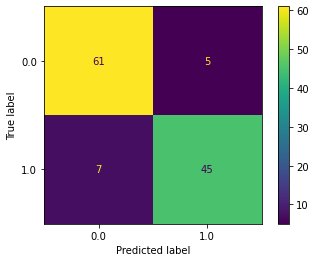

In [18]:
# Luminal vs Basal Separation
svc_mod = SVC(kernel="linear", C=1000)
svc_mod.fit(lb_data_mod, lb_labels_mod)
plot_confusion_matrix(svc_mod, lb_data_mod, lb_labels_mod)

In [19]:
H_LB_MOD = - svc_mod.intercept_[0]/linalg.norm(svc_mod.coef_[0])
hyperplane_normal_lb_mod = svc_mod.coef_[0]/linalg.norm(svc_mod.coef_[0])
state_vec_lb_mod = (basal_centroid_mod - luminal_centroid_mod)/linalg.norm(luminal_centroid_mod - basal_centroid_mod)

angle_train = degrees(np.arccos(np.dot(hyperplane_normal_lb_mod,state_vec_lb_mod)))
print(angle_train)

norm_stv_df_mod = pd.DataFrame(state_vec_lb_mod,index=lb_data_mod.columns,columns=['STV_LB_mod'])
norm_stv_df_mod.insert(0,'Norm_LB_mod', hyperplane_normal_lb_mod)

norm_stv_df_mod.sort_values(by='Norm_LB_mod').to_csv('STV_Luminal_Basal_mod.csv')

display(norm_stv_df_mod.sort_values(by='Norm_LB_mod'))
np.dot(norm_stv_df_mod['Norm_LB_mod'],norm_stv_df_mod['STV_LB_mod'])

76.54168887613733


,Norm_LB_mod,STV_LB_mod
Unnamed: 0,,
p-BTK,-0.514838,-0.011408
β-CATENIN,-0.354087,-0.050570
p-MAP2K3,-0.294435,-0.014697
p-PDPK1,-0.221487,-0.066936
cleaved PARP,-0.211541,0.034779
p-STAT5,-0.152468,-0.002856
GAPDH,-0.039950,-0.051547
p-RB,-0.016764,-0.588838
p-4EBP1,-0.012573,-0.105499


0.23273779784481047

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


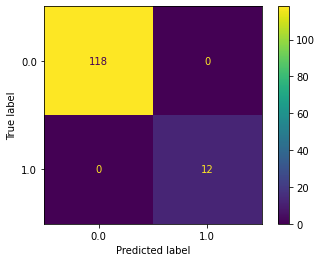

In [20]:
# Cancer vs Non-cancer
svc_canc_mod = SVC(kernel="linear", C=100)
svc_canc_mod.fit(canc_data_mod, canc_labels_mod)
plot_confusion_matrix(svc_canc_mod, canc_data_mod, canc_labels_mod)

canc_centroid_mod = (basal_centroid_mod + luminal_centroid_mod)/2.0

H_CANC_MOD = - svc_canc_mod.intercept_[0]/linalg.norm(svc_canc_mod.coef_[0])
hyperplane_normal_canc_mod = svc_canc_mod.coef_[0]/linalg.norm(svc_canc_mod.coef_[0])
state_vec_canc_mod = (canc_centroid_mod - normal_centroid_mod)/linalg.norm(canc_centroid_mod - normal_centroid_mod)


In [21]:
composite_vec_mod = pd.DataFrame(np.array([hyperplane_normal_canc_mod , np.array(state_vec_canc_mod),hyperplane_normal_lb_mod,np.array(state_vec_lb_mod)]),columns=luminal_mod.T.index,index=['Norm_Canc_mod','Canc_STV_mod','Norm_LB_mod','LB_STV_mod']).T
composite_vec_mod.to_csv('STV_2D_mod.csv')
composite_vec_mod

,Norm_Canc_mod,Canc_STV_mod,Norm_LB_mod,LB_STV_mod
Unnamed: 0,,,,
p-CREB,-0.520500,0.171282,0.045116,-0.013893
p-STAT5,0.392012,0.056129,-0.152468,-0.002856
p-SRC,0.144886,0.041842,-0.007688,0.066007
p-FAK,-0.251654,0.162877,0.067486,0.160067
p-MAPKAPK-2,-0.071239,0.154193,0.061348,0.132970
p-S6K,0.086341,0.034401,0.038117,-0.020466
p-MAP2K3,-0.027817,0.061259,-0.294435,-0.014697
p-p53,0.042404,0.156759,0.023903,-0.006713
p-p38,-0.164910,0.047993,0.405560,0.170948


In [22]:
mod_full_df = df.drop(output_lst, axis=1)#.drop(["Specific DPD", "Group"], axis=1)
mod_full_df.index += "_" + mod_full_df["group_replicate"]
mod_full_df = mod_full_df.drop(["p-MEK1/2", "p-AKT(308)", "line_replicate", "group_replicate"], axis=1)
# mod_full_df.set_index("cell_line", inplace=True)


composite_dpd_mod = pd.DataFrame(np.zeros((len(mod_full_df.T.columns),2)),index=mod_full_df.T.columns,columns=['DPD_Canc_mod','DPD_LB_mod'])
composite_dpd_mod["DPD_LB_mod"] = mod_full_df.apply(calculate_dpd, args=(mod_full_df, H_LB_MOD, composite_vec_mod["LB_STV_mod"], composite_vec_mod["Norm_LB_mod"]), axis=1)
composite_dpd_mod["DPD_Canc_mod"] = mod_full_df.apply(calculate_dpd, args=(mod_full_df, H_CANC_MOD, composite_vec_mod["Canc_STV_mod"], composite_vec_mod["Norm_Canc_mod"]), axis=1)


# for smpl in mod_full_df.T.columns:
#     DPDs_2D_mod_nfull.at[smpl,'DPD_canc'] = - (b_coeff_canc_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_canc']))/np.dot(norm_vec_2D_df_mod['norm_vec_canc'],norm_vec_2D_df_mod['s_vec_canc'])
#     DPDs_2D_mod_nfull.at[smpl,'DPD_LB'] = - (b_coeff_LB_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_LB']))/np.dot(norm_vec_2D_df_mod['norm_vec_LB'],norm_vec_2D_df_mod['s_vec_LB'])
        
composite_dpd_mod_full = composite_dpd_mod.filter(regex="_full", axis=0)
display(composite_dpd_mod_full)
composite_dpd_mod_full["cell_line_full"] = composite_dpd_mod_full.apply(lambda row: row.name[0:row.name.find("_full.fcs.fcs")], axis=1)
composite_dpd_mod_full = composite_dpd_mod_full.set_index("cell_line_full")


,DPD_Canc_mod,DPD_LB_mod
UACC3199_full_full_A_full.fcs.fcs,2.586232,0.740326
UACC3199_full_full_B_full.fcs.fcs,3.05524,0.471061
184A1_full_full_A_full.fcs.fcs,-0.770482,1.56857
184A1_full_full_B_full.fcs.fcs,-1.295548,1.819843
HCC1428_full_full_A_full.fcs.fcs,5.210558,-3.111924
...,...,...
T47D_full_full_B_full.fcs.fcs,1.893154,-1.013691
ZR75B_full_full_B_full.fcs.fcs,2.22954,-1.086831
ZR75B_full_full_A_full.fcs.fcs,2.712136,-1.145325
CAL851_full_full_A_full.fcs.fcs,0.275072,2.148426


/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1351/3215922616.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composite_dpd_mod_full["cell_line_full"] = composite_dpd_mod_full.apply(lambda row: row.name[0:row.name.find("_full.fcs.fcs")], axis=1)


In [23]:
def plot_gen_dpd():
    disp_df = composite_dpd_mod_full
    # disp_df.drop(["Cell_line"], axis=1, inplace=True)
    disp_df.columns = ["Normal/Cancer DPD", "Luminal/Basal DPD"]
    disp_df.index.name = "Cell line"
    return disp_df
    
dpd_plot = plot_gen_dpd()

In [24]:
display(dpd_plot)
html = dpd_plot.head(15).apply(pd.to_numeric).style.background_gradient().to_html()
import imgkit
# export high quality image
imgkit.from_string(html, 'styled_table.png', options={"width": 160, "height":500})

,Normal/Cancer DPD,Luminal/Basal DPD
Cell line,,
UACC3199_full_full_A,2.586232,0.740326
UACC3199_full_full_B,3.05524,0.471061
184A1_full_full_A,-0.770482,1.56857
184A1_full_full_B,-1.295548,1.819843
HCC1428_full_full_A,5.210558,-3.111924
...,...,...
T47D_full_full_B,1.893154,-1.013691
ZR75B_full_full_B,2.22954,-1.086831
ZR75B_full_full_A,2.712136,-1.145325


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [25]:
# !pip install plotly
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)


mod_df_pca = mod_df
mod_df_pca = mod_df_pca.drop(["treatment", "cell_line", "time", "line_replicate", "group_replicate", "cell_line"], axis=1).reset_index().fillna(0).drop("index", axis=1)
mod_df_pca["DPD"] = mod_df_pca.apply(calculate_dpd, args=(mod_df_pca, H_CANC_MOD, composite_vec_mod["Canc_STV_mod"], composite_vec_mod["Norm_Canc_mod"]), axis=1)


# display(mod_df_pca)
components = pca.fit_transform(mod_df_pca)


fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=mod_df_pca["DPD"],
    # title=f'Total Explained Variance: {total_var:.2f}%',
    # labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()



In [26]:
import random
from scipy.spatial.distance import hamming
def k_fold_validate(k, num_iter, type_class, dataframe):
    # create groups
    total_avg = 0
    
    for iter in range(num_iter):
        new_dataframe = dataframe
        if(type_class == "LB"):
            new_dataframe = dataframe[dataframe["Type"] != "Normal"]
        new_dataframe = new_dataframe[(new_dataframe.index != "HCC38") & (new_dataframe.index != "HCC70")]
    
        # print(f"Size of L/B dataset: {len(new_dataframe.index)}")
        # split data into groups
        groups = []
        while True:
            try:
                sample = new_dataframe.sample(k)
                new_dataframe = new_dataframe.drop(sample.index)
                groups.append(sample)
            except Exception as e:
                # print(e)
                # print(f"{len(new_dataframe.index)} datapoint left over")
                # groups.append(new_dataframe)
                break
        
        avg = 0
    
        for i in range(len(groups)):
            # creating training set from all groups except current one
            training_set = pd.concat([groups[j] for j in range(len(groups)) if j != i])
            # get cell line types into separate column
            if(type_class == "LB"):
                training_set["label_bin"] = training_set["Type"].apply(lambda line_type: 0 if line_type == "L" else 1)
            else:
                 training_set["label_bin"] = training_set["Type"].apply(lambda line_type: 1 if (line_type == "L" or line_type == "B") else 0)

            # get list of labels
            label_lst = list(training_set["label_bin"])
            # filter training set and prepare for SVM
            training_set = training_set.reset_index().drop(drop_lst, axis=1).drop("label_bin", axis=1).fillna(0)
            training_set = training_set.drop("index", axis=1)
            # display(training_set)
            # create SVM
            svm_kfold = SVC(kernel="linear", C=100)
            # fit data
            svm_kfold.fit(training_set, label_lst)


            # use current group for test
            test_sample = groups[i]
            # get label list
            true_label = list(test_sample["Type"])
            # filter sample 
            test_sample = test_sample.reset_index().drop(drop_lst, axis=1).fillna(0)
            test_sample = test_sample.drop("index", axis=1)
            predicted_type = svm_kfold.predict(test_sample)
            if(type_class == "LB"):
                prediction_bin = list(map(lambda x: 0 if x == "L" else 1, true_label))
            else:
                prediction_bin = list(map(lambda x: 1 if (x == "L" or x == "B") else 0, true_label))
            # print(prediction_bin)
            # print(predicted_type)
            avg += (hamming(prediction_bin, predicted_type))

        total_avg += (avg / len(groups))

    return (1 - (total_avg / num_iter))
    


new_mod_full_df = full_dataframe.drop(output_lst, axis=1)
new_mod_full_df = new_mod_full_df.drop(["p-MEK1/2", "p-AKT(308)"], axis=1)
# create 2 * 2 dataframe to hold results
# k_fold_df = pd.DataFrame(columns=["Original", "Modified"], index=["Luminal/Basal", "Normal/Cancerous"])
# # fill with results
# k_fold_df["Original"]["Luminal/Basal"] = (k_fold_validate(8,1000, "LB", full_dataframe))
# k_fold_df["Original"]["Normal/Cancerous"] = (k_fold_validate(8,1000, "NC", full_dataframe))
# k_fold_df["Modified"]["Luminal/Basal"] = (k_fold_validate(8,1000, "LB", new_mod_full_df))
# k_fold_df["Modified"]["Normal/Cancerous"] = (k_fold_validate(8,1000, "NC", new_mod_full_df))

# # (k_fold_validate(8,1000, "NC", full_dataframe))
# print(k_fold_validate(8,1000, "LB", new_mod_full_df))
# print(k_fold_validate(8,1000, "NC", new_mod_full_df))

# df_copy
# df_copy_out2 = df_copy.drop([col for col in df_copy.columns if col not in output_lst and col not in ["cell_line", "time", "treatment", "group_replicate", "line_replicate"]], axis=1).reset_index(drop=True)


# for pert in perts_lst:
#     for repl in range(5):
#         display(df_copy_out2[(df_copy_out2.cell_line == "MDAMB231") & (df_copy_out2.treatment == pert) & (df_copy_out2.time == "17") & (df_copy_out2.group_replicate == str(repl)) & ("B" == df_copy_out2.line_replicate)])

# use regex to find all index values that contain MDAMB231 and line_replicate == "B"


# display(df_copy_out2[(df_copy_out2.cell_line == "MCF10A") & (df_copy_out2.treatment == "iPI3K") & (df_copy_out2.time == "17") & (df_copy_out2.group_replicate == "0") & ("B" == df_copy_out2.line_replicate)])

In [27]:
perts_lst = ['iEGFR', 'iPI3K', 'imTOR', 'iMEK', 'iPKC']
# print(output_lst)
module_lst = ["EGFR", "PI3K", "mTOR", "MEK", "PKC", "TGFb_SMAD", "STAT3"]
# column list in the style of EGFR_0, EGFR_1, MEK_0, MEK_1, etc. for all in module_lst
cols_R_lst = []
num_replicates = 5
for pert in perts_lst:
    for t in range(num_replicates):
        cols_R_lst.append(pert + "_" + str(t))

opposites = {
    "A": "B",
    "B": "A"
}

time_map = {
    "0" : "0",
    "7" : "9",
    "13" : "17",
    "40" : "60",
    "60" : "40",
    "17" : "13",
    "9" : "7"

}

def create_resp_mat(line,type_AB, time):
    # drop all columns in df_copy but but the ones in mod_out_lst
    df_copy_out = df_copy.drop([col for col in df_copy.columns if col not in output_lst and col not in ["cell_line", "time", "treatment", "group_replicate", "line_replicate"]], axis=1).reset_index(drop=True)
    matrix = pd.DataFrame(index=module_lst + ["DPD_Canc", "DPD_LB"], columns=cols_R_lst)
    print(matrix.shape)
    # display(df_copy_out)
    df_copy_out = df_copy_out[df_copy_out["treatment"] != "full"]
    
    # if type_AB == "A":
    #     time = [0,9,13,40]
    # else:
    #     time = [0, 7, 17, 60]

    for module in module_lst:
        # for t in time:
        for repl in range(num_replicates):
            for pert in perts_lst:
                try:
                    output = modules_df["Output"].loc[module]

                    # output = "p.Akt.Ser473." if output == "p.Akt.Ser473" else output
                    x_1_df = df_copy_out[(df_copy_out.cell_line == line) & (df_copy_out.time == str(time)) & (df_copy_out.treatment == pert) & (df_copy_out.group_replicate == str(repl)) & (df_copy_out.line_replicate == type_AB)]
                    x_0_df =  df_copy_out[(df_copy_out.cell_line == line) & (df_copy_out.time == str(time)) & (df_copy_out.treatment == "egf") & (df_copy_out.group_replicate == str(repl)) & (df_copy_out.line_replicate == type_AB)]
                    # display(x_1_df)
                    x_0 = x_0_df[output].iloc[0]
                    x_1 = x_1_df[output].iloc[0]
                    rij = 2*(x_1 - x_0) / (x_1+x_0)
                    matrix.at[module, f"{pert}_{repl}"] = rij
                except Exception as e:
                    try:
                        x_1_df = df_copy_out[(df_copy_out.cell_line == line) & (df_copy_out.time == str(time_map[str(time)])) & (df_copy_out.treatment == pert) & (df_copy_out.group_replicate == str(repl)) & (df_copy_out.line_replicate == opposites[type_AB])]
                        x_0_df =  df_copy_out[(df_copy_out.cell_line == line) & (df_copy_out.time == str(time_map[str(time)])) & (df_copy_out.treatment == "egf") & (df_copy_out.group_replicate == str(repl)) & (df_copy_out.line_replicate == opposites[type_AB])]
                        x_0 = x_0_df[output].iloc[0]
                        x_1 = x_1_df[output].iloc[0]
                        rij = 2*(x_1 - x_0) / (x_1+x_0)
                        matrix.at[module, f"{pert}_{repl}"] = rij
                    except:
                        print(e)
                        print(f"Module exception for {module} at {pert}_{repl} for line {line} at time {time} and type {opposites[type_AB]}")
                        matrix.at[module, f"{pert}_{repl}"] = 0
 
        
            for dpd_module in ["DPD_Canc", "DPD_LB"]:
                for pert in perts_lst:
                    try:
                        line_comb_x1 = f"{line}_{time}_{pert}_{type_AB}_{repl}"
                        line_comb_x0 = f"{line}_{time}_egf_{type_AB}_{repl}"
                    
                        # print(line_comb)
                        s_1 = composite_dpd_mod.loc[line_comb_x1].loc[dpd_module+"_mod"]
                        s_0 = composite_dpd_mod.loc[line_comb_x0].loc[dpd_module+"_mod"]
                        # val = 2* (s_1 - s_0) / (np.abs(s_0) + np.abs(s_1))
                        val = (s_1 - s_0) / np.abs(s_0)
                        matrix.at[dpd_module, f"{pert}_{repl}"] = val
                        # print(x_1_df)
                    # x_1_df = DPDs_2D_mod_nfull
                    except Exception as e:
                        try:
                            line_comb_x1 = f"{line}_{time_map[str(time)]}_{pert}_{opposites[type_AB]}_{repl}"
                            line_comb_x0 = f"{line}_{time_map[str(time)]}_egf_{opposites[type_AB]}_{repl}"
                        
                            s_1 = composite_dpd_mod.loc[line_comb_x1].loc[dpd_module+"_mod"]
                            s_0 = composite_dpd_mod.loc[line_comb_x0].loc[dpd_module+"_mod"]
                            # val = 2* (s_1 - s_0) / (np.abs(s_0) + np.abs(s_1))
                            val = (s_1 - s_0) / np.abs(s_0)
                            matrix.at[dpd_module, f"{pert}_{repl}"] = val
                        except Exception as e: 
                            print("DPD exception")
                            print(e)
                            matrix.at[dpd_module,f"{pert}_{repl}"] = 0

    return matrix

# create_resp_mat("MCF10A", "A", 0)
# df_copy.set_index("cell_line")
# modules_df

In [28]:
import os
import os
cwd = os.getcwd()
# os.mkdir("RAW")
# os.mkdir("RAW")
# timestamps = [0.0,7.0,9.0,13.0,17.0,40.0,60.0]
# timestamp_tuples = [(7.0,9.0),(13.0,17.0),(40.0,60.0)]

def create_global_mat():
    cell_lines_all = list(df_copy.cell_line.unique())
    # cell_lines_all = ["MDAMB231", "MCF10A", "MDAMB157", "MCF7"]
    for ab_repl in ["B"]:
        if ab_repl == "A":
            timestamps = [0,9,13,40]
        else:
            timestamps = [0, 7, 17, 60]
            
        for line in cell_lines_all:
            for t in timestamps:
                local_resp_mat = create_resp_mat(line,ab_repl, t).fillna(0)
                # break
                display(local_resp_mat.shape)
                local_resp_mat.to_csv(f"RAW/{line}_{ab_repl}_{t}.csv", index=False, header=False)



# print(cwd)
# create_global_mat()

In [29]:
# global_resp_matrix.at["184A1", "1317"]
# modules_df

In [30]:
# # begin model helper code
# ax = plt.gca()
# ax.set_ylim([-20, 20])
# DPD_range_avg = np.arange(-5, 5, 0.001)
# params = {
#     "a" : 0.5,
#     "b" : 0.5,
#     "c" : -4.3,
# }
# plt.plot(DPD_range_avg, params["a"] * DPD_range_avg**4 + params["b"] * DPD_range_avg**3 + params["c"] * DPD_range_avg**2 + 2)
# plt.plot(DPD_range_avg, -1 * (params["a"]*4*DPD_range_avg**3 + params["b"] * 3 * DPD_range_avg**2 + params["c"] * 2 * DPD_range_avg))
# plt.plot(DPD_range_avg, DPD_range_avg*0)

In [31]:
# create data file (exp) for training model
# I'm taking signaling module outputs to be reflective of the module phosphorylation levels

def create_exp_file():
    new_timestamps = [0.0, 9.0, 17.0, 60.0]
    # new_timestamps = [0.0, 60.0]
    tp_dict = {
        0.0 : 0.0,
        60.0 : 40.0
    }

    df_modules = df[list(modules_df["Output"])]
    # display(df_modules.loc["184A1_0.0_iPI3K"])



    # display(df_modules)
    p_modules = ["pEGFR", "pMEK", "pPI3K", "pPKC", "pmTOR", "pSTAT3", "pSMAD"]
    # p_modules = ["pEGFR", "pMEK", "pPI3K", "pPKC"]    # display(df_modules)
    cell_lines = df_copy.cell_line.unique()
    try:
        os.mkdir("model/data/")
    except:
        pass

    p_modules = ["exp_" + m for m in p_modules]
    sd_modules = [m+"_SD" for m in p_modules]
    # first_row = "# time " + " ".join(p_modules) + " " + " ".join(sd_modules) + "\n"
    first_row = "# time " + " ".join(p_modules) + "\n"
    # first_row_dpd = "# time S_LB S_NC S_LB_SD S_NC_SD\n"
    first_row_dpd = "# time S_LB S_NC\n"

    for line in cell_lines:
        for pert in perts_lst+["EGF"]:
            try:
                f_exp = open(f"model/data/{line}_{pert}.exp", "w+")
                f_exp.write(first_row)
                f_exp.write("0 1 1 1 1 1 1 1\n")
                f_dpd_exp = open(f"model/data/DPD_trajectory_{line}_{pert}.exp", "w+")
                f_dpd_exp.write(first_row_dpd)
                
                init_point = df_modules.T[f"{line}_0.0_{pert}"]
                
                for t in new_timestamps:
                    exp_point = df_modules.T[f"{line}_{t}_{pert}"]
                    # exp_complementary = df_modules.T[f"{line}_{tp_dict[t]}_{pert}"]
                    
                    # calculate standard deviation between exp_point and exp_complementary
                    # mean = (exp_point + exp_complementary) / 2
                    # std = np.sqrt((exp_point-mean)**2 + (exp_complementary-mean)**2)
                    
                    # normalize
                    exp_point = exp_point / init_point
                                                 
                    # display(exp_point)
                    # display(exp_point)
                    if pert != "EGF":
                        f_exp.write(f"{int(t+15)*60} " + " ".join(map(str, list(exp_point)[:len(p_modules)])) + "\n")
                    else:
                        f_exp.write(f"{int(t)*60} " + " ".join(map(str, list(exp_point)[:len(p_modules)])) + "\n")
                    # f_exp.write(f"{int(t+15)*60} " + " ".join(map(str, list(exp_point))) +" " + " ".join(map(str, list(std))) + "\n")
                    line_name = f"{line}_{int(t)}_{pert}"
                    lb_point = composite_dpd_mod.loc[line_name]['DPD_LB_mod']
                    nc_point = composite_dpd_mod.loc[line_name]['DPD_Canc_mod']
                    # lb_complementary = composite_dpd_mod.loc[f"{line}_{tp_dict[t]}_{pert}"]['DPD_LB_mod']
                    # nc_complementary = composite_dpd_mod.loc[f"{line}_{tp_dict[t]}_{pert}"]['DPD_Canc_mod']
                    # lb_mean = (lb_point + lb_complementary) / 2
                    # nc_mean = (nc_point + nc_complementary) / 2
                    # lb_std = np.sqrt((lb_point-lb_mean)**2 + (lb_complementary-lb_mean)**2)
                    # nc_std = np.sqrt((nc_point-nc_mean)**2 + (nc_complementary-nc_mean)**2)
                    if pert != "EGF":
                        f_dpd_exp.write(f"{int(t+15)*60} {lb_point} {nc_point} \n")
                    else:
                        f_dpd_exp.write(f"{int(t)*60} {lb_point} {nc_point} \n")
                f_exp.close()
                f_dpd_exp.close()
            except Exception as e:
                print(e)
                continue

# return df
create_exp_file()

'UACC3199_0.0_iEGFR'
'UACC3199_0.0_iPI3K'
'UACC3199_0.0_imTOR'
'UACC3199_0.0_iMEK'
'UACC3199_0.0_iPKC'
'UACC3199_0.0_EGF'
'184A1_0.0_iEGFR'
'184A1_0.0_iPI3K'
'184A1_0.0_imTOR'
'184A1_0.0_iMEK'
'184A1_0.0_iPKC'
'184A1_0.0_EGF'
'HCC1428_0.0_iEGFR'
'HCC1428_0.0_iPI3K'
'HCC1428_0.0_imTOR'
'HCC1428_0.0_iMEK'
'HCC1428_0.0_iPKC'
'HCC1428_0.0_EGF'
'AU565_0.0_iEGFR'
'AU565_0.0_iPI3K'
'AU565_0.0_imTOR'
'AU565_0.0_iMEK'
'AU565_0.0_iPKC'
'AU565_0.0_EGF'
'HCC202_0.0_iEGFR'
'HCC202_0.0_iPI3K'
'HCC202_0.0_imTOR'
'HCC202_0.0_iMEK'
'HCC202_0.0_iPKC'
'HCC202_0.0_EGF'
'BT20_0.0_iEGFR'
'BT20_0.0_iPI3K'
'BT20_0.0_imTOR'
'BT20_0.0_iMEK'
'BT20_0.0_iPKC'
'BT20_0.0_EGF'
'BT474_0.0_iEGFR'
'BT474_0.0_iPI3K'
'BT474_0.0_imTOR'
'BT474_0.0_iMEK'
'BT474_0.0_iPKC'
'BT474_0.0_EGF'
'BT483_0.0_iEGFR'
'BT483_0.0_iPI3K'
'BT483_0.0_imTOR'
'BT483_0.0_iMEK'
'BT483_0.0_iPKC'
'BT483_0.0_EGF'
'MDAMB453_0.0_iEGFR'
'MDAMB453_0.0_iPI3K'
'MDAMB453_0.0_imTOR'
'MDAMB453_0.0_iMEK'
'MDAMB453_0.0_iPKC'
'MDAMB453_0.0_EGF'
'ZR7530_0.0_iEGF

In [32]:
def get_confidence(sd):
    # 95% confidence interval
    n = 5000
    z = 1.96
    return z * (sd/np.sqrt(n))

# new_timestamps = ["7.0_9.0", "13.0_17.0", "40.0_60.0"]
new_timestamps = ["40.0_60.0"]

def create_bpsl(cell_line_name):
    module_lst.append("DPD_NC")
    module_lst.append("DPD_LB")

    try:
        os.mkdir("model/prop")
    except:
        pass

    f_prop = open(f"model/prop/{cell_line_name}.prop", "w+")
    f_func_dpd = open(f"conn_dpd.txt", "w+")

    for t in new_timestamps:
        bmra_sd_df = pd.read_csv(f"results_BMRA/{cell_line_name}_{t}_rs.csv") 
        confidence_matrix = bmra_sd_df.applymap(get_confidence)
        # bmra_sd_df_60 = pd.read_csv(f"/Users/atamb/Documents/BMRA_BC_CYTOF/results_BC_CYTOF/{cell_line_name}_60.0_rs.csv")
        # confidence_matrix_60 = bmra_sd_df_60.applymap(get_confidence)
        # bmra_conn_mean_60 = pd.read_csv(f"/Users/atamb/Documents/BMRA_BC_CYTOF/results_BC_CYTOF/{cell_line_name}_60.0_rm.csv")
        bmra_conn_mean = pd.read_csv(f"results_BMRA/{cell_line_name}_{t}_rm.csv")
        display(bmra_conn_mean)
        for i_module in range(9):
            for influence in range(7):
                if(module_lst[i_module] == module_lst[influence]):
                    continue
                conn = bmra_conn_mean.iloc[i_module][influence]
                conf_int = confidence_matrix.iloc[i_module][influence]
                if(conn == 0):
                    continue

                
                if(module_lst[i_module] == "DPD_LB"):
                    f_func_dpd.write(f"{module_lst[influence]}_DPD_LB() = (b_lb_{module_lst[influence].lower()})\n")
                    
                if(module_lst[i_module] == "DPD_NC"):
                    f_func_dpd.write(f"{module_lst[influence]}_DPD_NC() = (b_nc_{module_lst[influence].lower()})\n")
                    
                    
                    
                
                # conn_60 = bmra_conn_mean.iloc[i_module][influence]
                # conf_int_60 = confidence_matrix_60.iloc[i_module][influence]
                f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn < {conn + conf_int} always\n")
                f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn > {conn - conf_int} always\n")
                
    f_prop.close()
    f_func_dpd.close()
                 # f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn < {conn_60 + conf_int_60} at {60}\n")
                # f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn > {conn_60 - conf_int_60} at {60}\n") 

create_bpsl("MCF10A")

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
0,0.000000,0.048674,0.073486,-0.060921,0.048159,0.251653,0.000000,0,0
1,0.168224,0.000000,-0.003239,0.094579,0.000000,0.158395,0.323147,0,0
2,0.000000,-0.004835,0.000000,0.008328,-0.070598,0.000000,0.000000,0,0
3,0.449072,0.060956,0.061485,0.000000,0.000000,0.530721,-0.285573,0,0
4,0.606659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
6,1.588764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
7,0.000000,0.868253,-1.478997,-1.390159,1.372273,-0.205955,-1.509849,0,0
8,0.000000,0.011660,0.377202,0.367349,0.082348,0.375822,0.438497,0,0


In [33]:
# draw graph based on adjcancy matrix
import networkx as nx
import matplotlib.pyplot as plt
def plot_network(line, df_gplot=None, df_gplot_Am=None, weight_coef=1):
    # for t in [0, 7, 17, 60]:
    for t in [0,9,13,40]:
        if df_gplot is None:
            bmra_conn_mean = pd.read_csv(f"results_BMRA_new/{line}_A_{t}_Am.csv").round(0)
        else:
            bmra_conn_mean = df_gplot_Am


        bmra_conn_mean["module"] = ["EGFR", "PI3K_AKT", "mTOR", "MEK_ERK", "PKC", "TGFb-SMAD", "STAT3"] + ["DPD_NC", "DPD_LB"]
        bmra_conn_mean = bmra_conn_mean.set_index("module")
        # display(bmra_conn_mean)
        G = nx.from_pandas_adjacency(bmra_conn_mean.T, create_using=nx.DiGraph)

        if df_gplot is None:        
            bmra_rij_mean = pd.read_csv(f"results_BMRA_new/{line}_A_{t}_rm.csv")
        else:
            bmra_rij_mean = df_gplot

        bmra_rij_mean["module"] = ["EGFR", "PI3K_AKT", "mTOR", "MEK_ERK", "PKC", "TGFb-SMAD", "STAT3"] + ["DPD_NC", "DPD_LB"]
        bmra_rij_mean = bmra_rij_mean.set_index("module")
        display(bmra_rij_mean)
        # plot network graph based on interactions of labels in output_lst
        # display(bmra_conn_mean)
        plt.figure(figsize=(30,30))
        
        for edge in G.edges():
            val = (bmra_rij_mean.loc[edge[1]][edge[0]])
            G[edge[0]][edge[1]]['color'] ="red"
            G[edge[0]][edge[1]]['weight'] = np.abs(val)
        # plot network graph based on interactions of labels in output_lst
        labels = nx.get_edge_attributes(G,'weight')

        weights = [G[u][v]['weight']*weight_coef for u,v in G.edges()]
        color_lst = (["red" if (bmra_rij_mean.loc[edge[1]][edge[0]]) < 0 else "blue" for edge in G.edges()])
        # style_lst = ["|" if c=="red" else "-\|>" for c in color_lst]
        nx.draw(G, pos=nx.shell_layout(G), with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", boxstyle='round,pad=0.2') , edge_color=color_lst, arrowsize=20, font_size=50, width=weights)
        plt.show()

# plot_network("MDAMB453")

In [34]:
# # # get list of functional connections in adj matrix

# module_dict_new = {
#     "EGFR": "EGFR",
#     "PI3K_AKT": "PI3K",
#     "mTOR": "mTOR",
#     "MEK_ERK": "MEK",
#     "PKC": "PKC",
#     "TGFb-SMAD": "SMAD",
#     "STAT3": "STAT3",
# }


# def get_functional_conn_lst(adj_matrix_df):
#     functional_conn_lst = {
#         "EGFR": [],
#         "PI3K": [],
#         "mTOR": [],
#         "MEK": [],
#         "PKC": [],
#         "SMAD": [],
#         "STAT3": []
#     }

#     f = open("conn_params.txt", "w+")
#     f_func = open("conn_func.txt", "w+")
#     f_func_other = open("conn_func_other.txt", "w+")
#     for i in range(len(adj_matrix_df)):
#         for j in range(len(adj_matrix_df)):
#             if(adj_matrix_df.iloc[i][j] ==  1 and i != j and adj_matrix_df.columns[j][:3] != "DPD" and adj_matrix_df.columns[i][:3] != "DPD"):
#                 prot1 = module_dict_new[adj_matrix_df.columns[j]]
#                 prot2 = module_dict_new[adj_matrix_df.columns[i]]
#                 functional_conn_lst[prot2].append(prot1)
#                 f.write(f"{module_dict_new[adj_matrix_df.columns[j]]}_to_{module_dict_new[adj_matrix_df.columns[i]]} = {module_dict_new[adj_matrix_df.columns[j]]}_to_{module_dict_new[adj_matrix_df.columns[i]]}__FREE\n")
#                 f.write(f"K_{module_dict_new[adj_matrix_df.columns[j]]}_{module_dict_new[adj_matrix_df.columns[i]]} = K_{module_dict_new[adj_matrix_df.columns[j]]}_{module_dict_new[adj_matrix_df.columns[i]]}__FREE\n")
                

#                 # read conn coeff from file
#                 coef = pd.read_csv("results_BMRA/MCF10A_40.0_60.0_rm.csv")
#                 # display(coef)
#                 if(coef.loc[i][j] < 0):
#                     u_bound = 1
#                     l_bound = 0
#                 elif (coef.loc[i][j] > 0):
#                     u_bound = 100
#                     l_bound = 1

#                 print(f"uniform_var={module_dict_new[adj_matrix_df.columns[j]]}_to_{module_dict_new[adj_matrix_df.columns[i]]}__FREE {l_bound} {u_bound}")


#                 f_func.write(f"a_{prot1}_to_{prot2}() = ((1.0 + {prot1}_to_{prot2} * (p{prot1}/K_{prot1}_{prot2})) / (1.0 + p{prot1}/K_{prot1}_{prot2}))\n")
#                 f_func_other.write(f"{prot1}_{prot2}_fn() = ({prot1}_to_{prot2})\n")
    
#     f.close()
#     f_func.close()
#     f_func_other.close()
    
#     return functional_conn_lst

# # get consensus network 
# bmra_conn_consensus = pd.read_csv("/Users/atamb/compbio/consensus/consensus_MCF10A.csv")
# get_functional_conn_lst(bmra_conn_consensus)

# # bmra_conn_mean = pd.read_csv("/Users/atamb/compbio/consensus_MCF10A.csv")
# # func_conns = get_functional_conn_lst(bmra_conn_mean)
# # print(func_conns)
# # f_conns_rules = open("conn_func_rules.txt", "w+")
# # for mod_key in func_conns:
# #     for influence in func_conns[mod_key]:
# #         f_conns_rules.write(f"a_{influence}_to_{mod_key}() * ")
# #     f_conns_rules.write("\n")

# # f_conns_rules.close()

In [35]:
# # create parameters for config file

# lower_bound = 0.001
# upper_bound = 10000

# bngl_model = open("model/model.bngl", "r")
# bngl_conf = open("model/configtemp.txt", "w+")
# param_lines = [param_line.strip("\t").strip("\n").split("=")[1] for param_line in bngl_model.readlines() if "__FREE" in param_line]
# print(param_lines)
# log_vars = ["loguniform_var=" + param + f" {lower_bound} {upper_bound}" for param in param_lines if param != ""]


# for i in log_vars:
#     bngl_conf.write(i + "\n")
# bngl_conf.close()
# bngl_model.close()

In [36]:
# file_lst = ["data/MCF10A_iEGFR", "data/MCF10A_iPI3K", "data/MCF10A_imTOR", "data/MCF10A_iMEK", "data/MCF10A_iPKC", "data/MCF10A_iSMAD", "data/MCF10A_iSTAT3"]

In [37]:
#print num cores
# print("Number of cores: ", multiprocessing.cpu_count())

In [38]:

def create_consensus(type_cons):
    timestamps = [0, 7, 9, 13, 17, 40, 60]
    target_lines = list(df_copy["cell_line"].unique())
    consensus = { t : [] for t in target_lines }
    timestamps_a = [0,9,13,40]

    try:
        os.mkdir("consensus_new")
    except:
        pass

    try:
        os.mkdir("consensus_new_rm")
    except:
        pass

    for tl in target_lines:
        for timestamp in timestamps:
            try:
                if timestamp in timestamps_a:
                    type_ab = "A"
                else:
                    type_ab = "B"

                if(type_cons == "mean"):
                    bmra_adj_mean = pd.read_csv(f"results_BMRA_new/{tl}_{type_ab}_{timestamp}_Am.csv")
                else:
                    bmra_adj_mean = pd.read_csv(f"results_BMRA_new/{tl}_{type_ab}_{timestamp}_rm.csv")
                consensus[tl].append(bmra_adj_mean)
            except:
                pass

    # calculate consensus adj matrix by taking mean of all adj matrices for each cell line
    for tl in target_lines:
        try:
            if(type_cons == "mean"):
                consensus[tl] = pd.concat(consensus[tl]).groupby(level=0).mean()
            else:
                consensus[tl] = pd.concat(consensus[tl]).groupby(level=0).mean()
                # display(consensus[tl])
            # round to 1 if value > 0.25
            if(type_cons == "mean"):
                consensus[tl] = consensus[tl].mask(consensus[tl].gt(1/len(timestamps)), 1)
                # round to 0 if value < 0.25
                consensus[tl] = consensus[tl].mask(consensus[tl].lt(1/len(timestamps)), 0)
            if(type_cons == "mean"):
                consensus[tl].to_csv(f"consensus_new/consensus_{tl}_A.csv", index=False)
            else :
                consensus[tl].to_csv(f"consensus_new_rm/consensus_{tl}_A_rm.csv", index=False)
        except:
            pass

# create config file for each cell line
create_consensus("mean")
create_consensus("rij")

In [39]:
print("{", end="")
for l in list(df_copy.cell_line.unique()):
    print(f"'{l}' , ...")
print("}")

{'UACC3199' , ...
'184A1' , ...
'HCC1428' , ...
'AU565' , ...
'HCC202' , ...
'BT20' , ...
'BT474' , ...
'BT483' , ...
'MDAMB453' , ...
'ZR7530' , ...
'CAL120' , ...
'CAL148' , ...
'HDQP1' , ...
'CAL51' , ...
'MACLS2' , ...
'CAMA1' , ...
'HCC2185' , ...
'DU4475' , ...
'HCC3153' , ...
'EFM19' , ...
'HCC1143' , ...
'EVSAT' , ...
'EFM192A' , ...
'HBL100' , ...
'HCC1187' , ...
'HCC1419' , ...
'HCC1500' , ...
'HCC1395' , ...
'HCC2218' , ...
'HCC1599' , ...
'HCC1806' , ...
'HCC1937' , ...
'BT549' , ...
'HCC1954' , ...
'Hs578T' , ...
'JIMT1' , ...
'KPL1' , ...
'MCF10F' , ...
'MDAMB231' , ...
'MCF12A' , ...
'MCF7' , ...
'MDAkb2' , ...
'MDAMB468' , ...
'MDAMB134VI' , ...
'SKBR3' , ...
'MDAMB157' , ...
'HCC38' , ...
'MDAMB175VII' , ...
'MCF10A' , ...
'MDAMB361' , ...
'HCC1569' , ...
'MDAMB415' , ...
'MDAMB436' , ...
'HCC2157' , ...
'MX1' , ...
'MFM223' , ...
'LY2' , ...
'MPE600' , ...
'OCUBM' , ...
'184B5' , ...
'UACC812' , ...
'ZR751' , ...
'UACC893' , ...
'T47D' , ...
'ZR75B' , ...
'CAL851' , .

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0, 60.0, 7.0]
[0.0, 17.0,

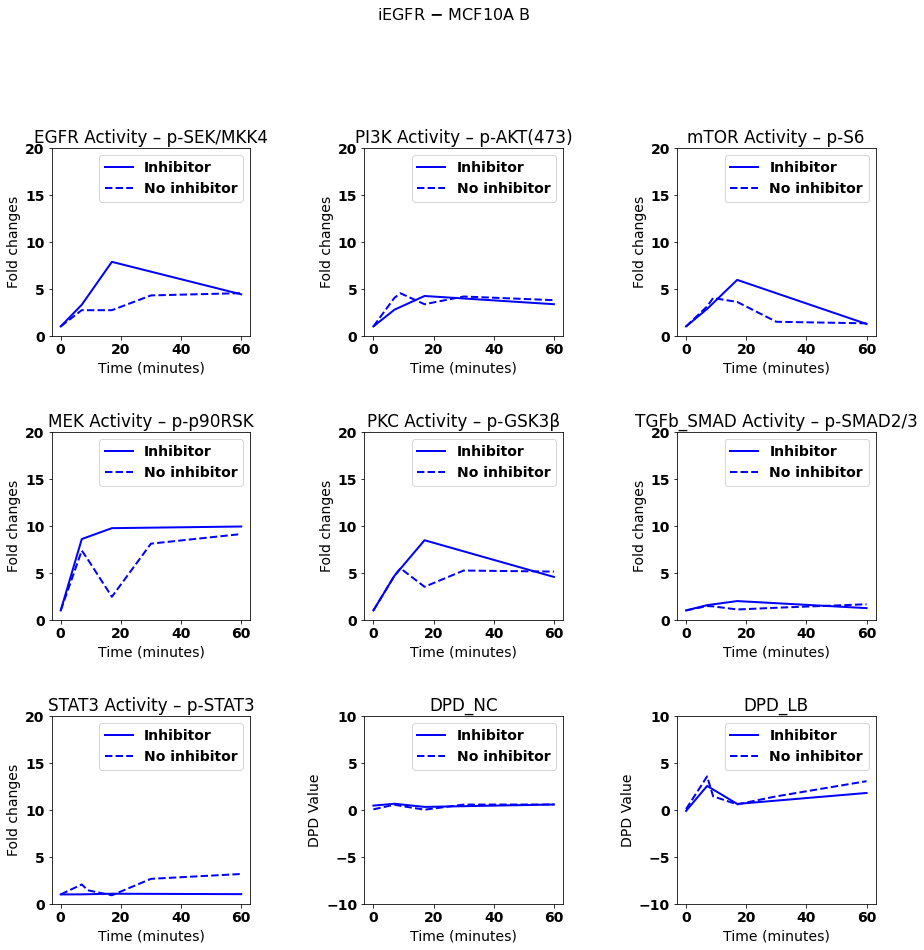

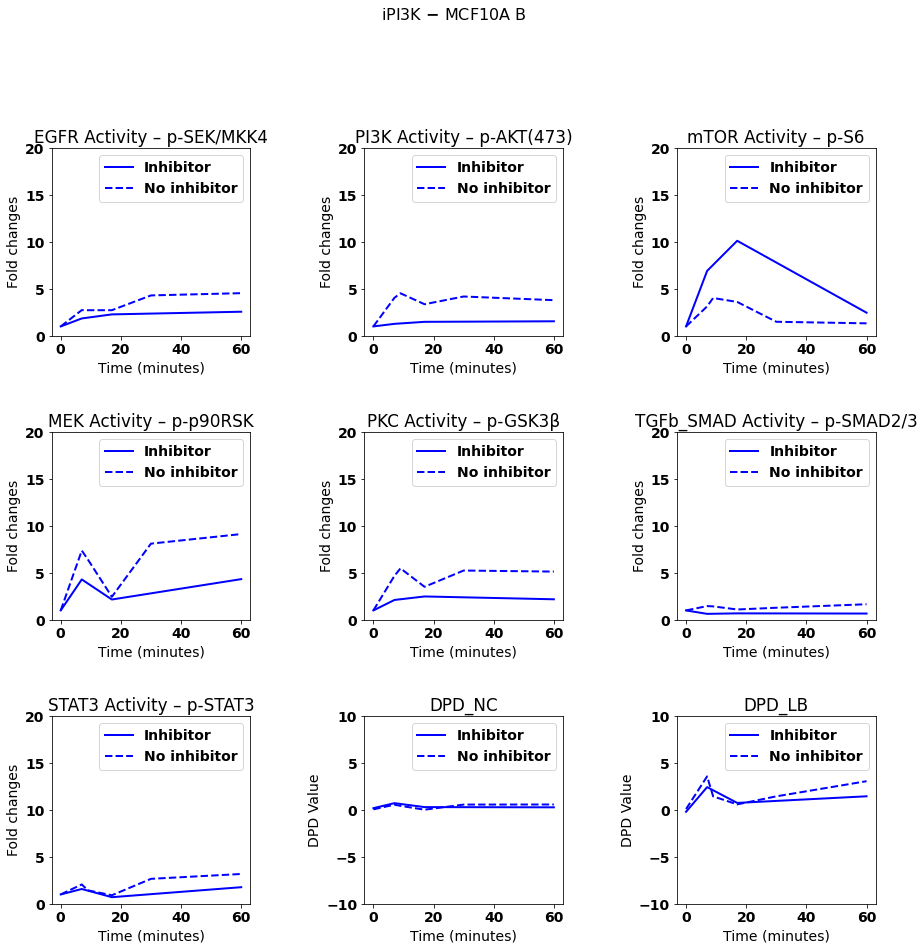

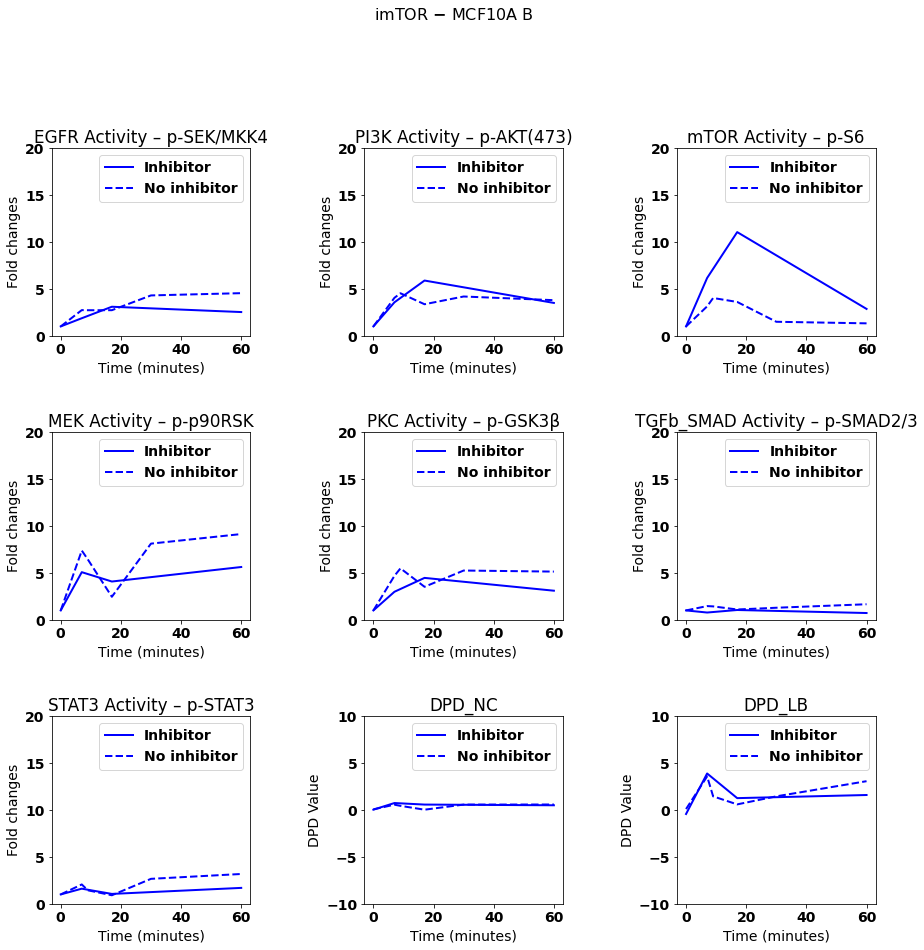

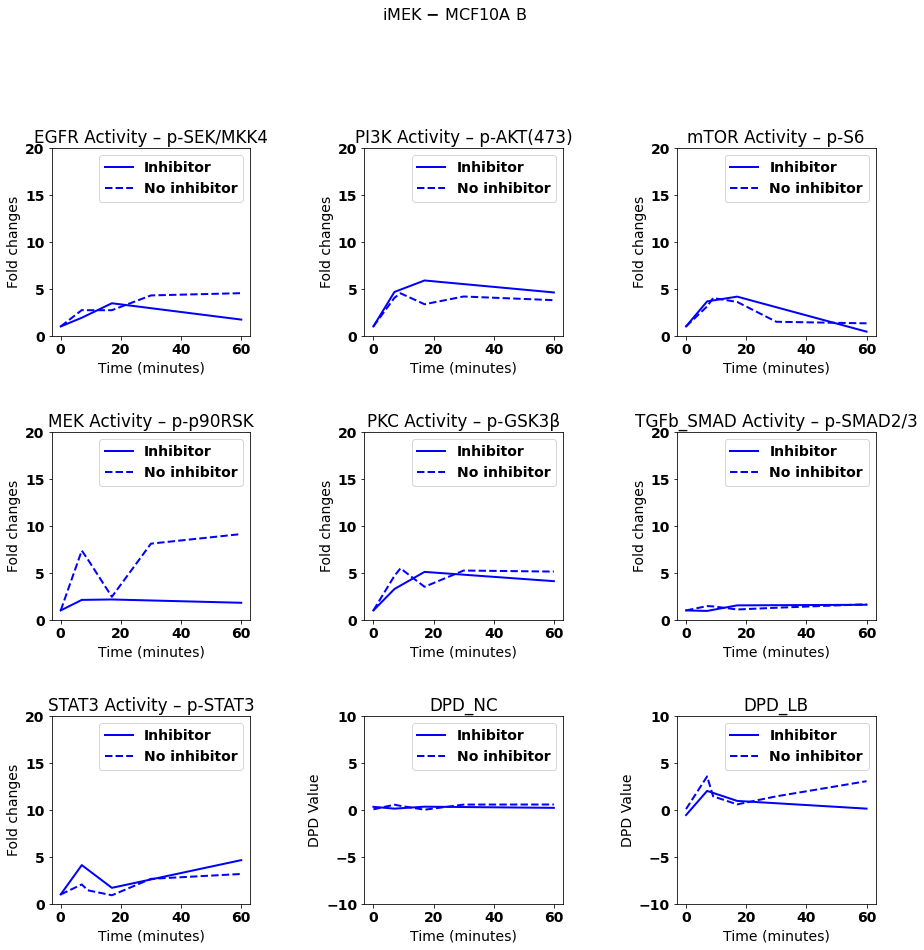

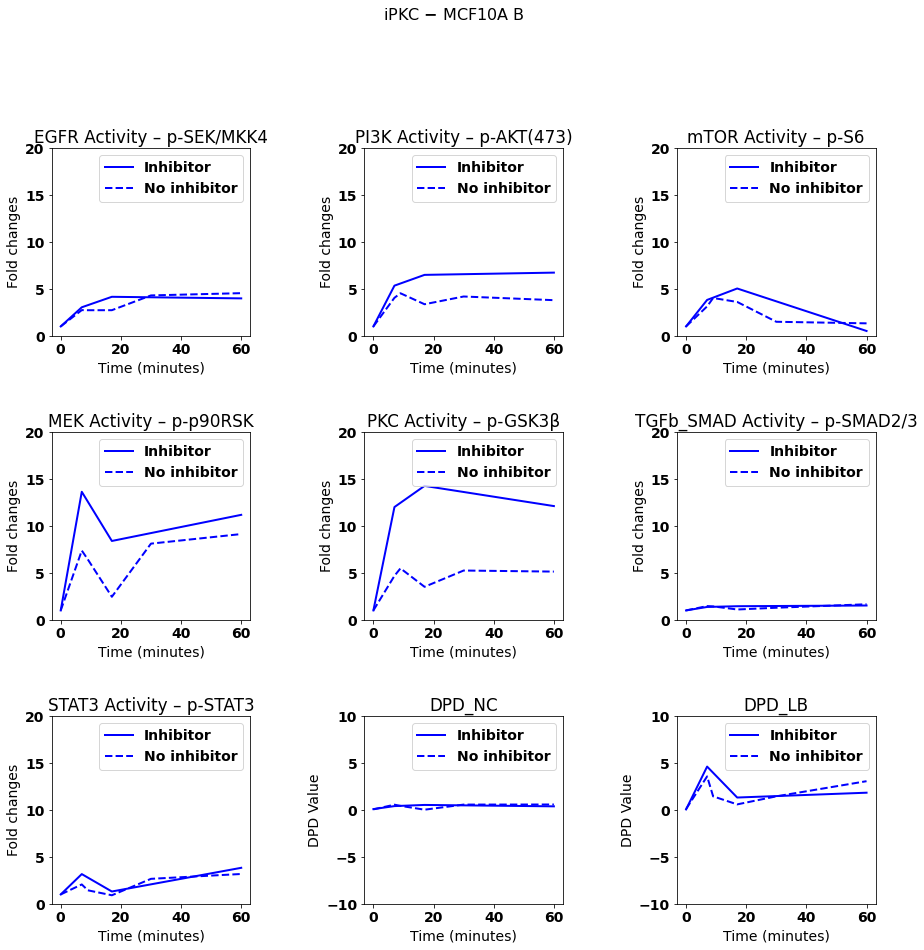

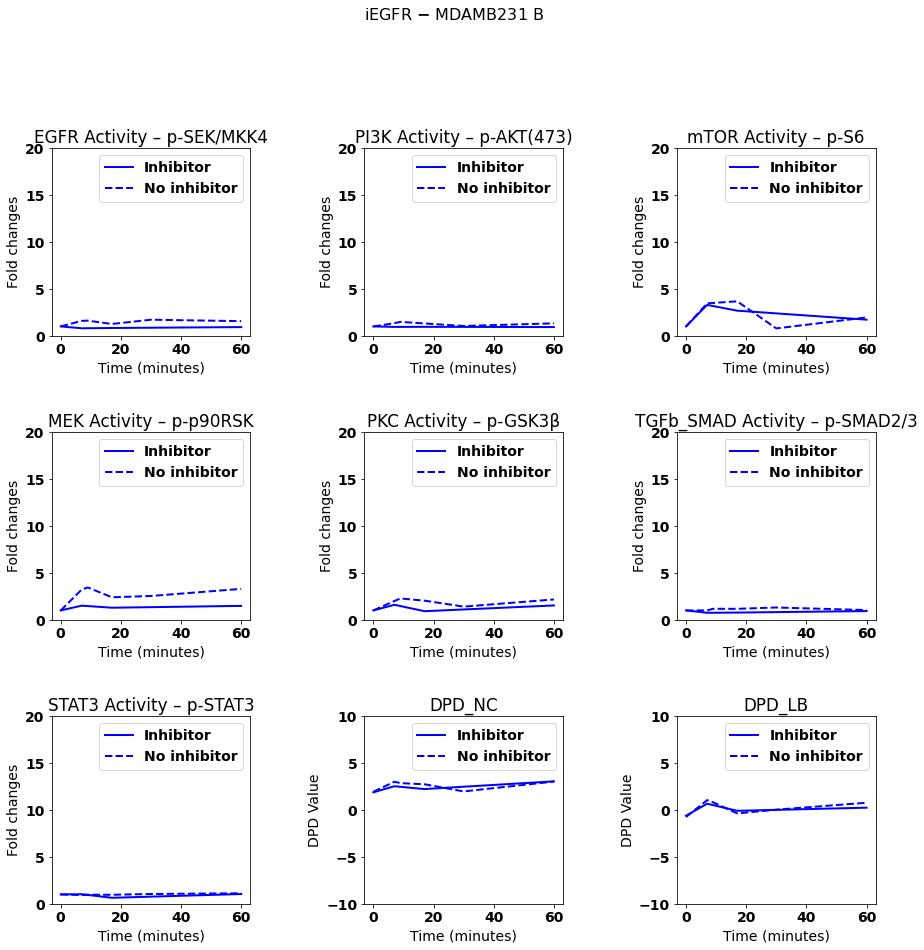

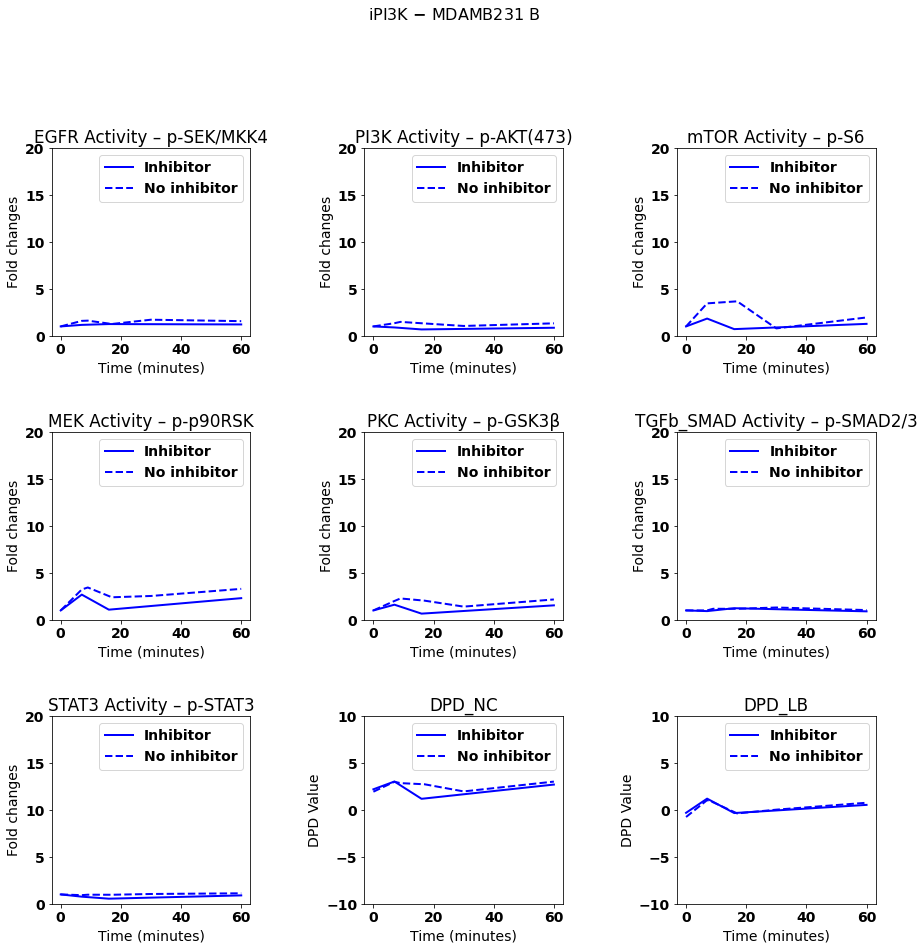

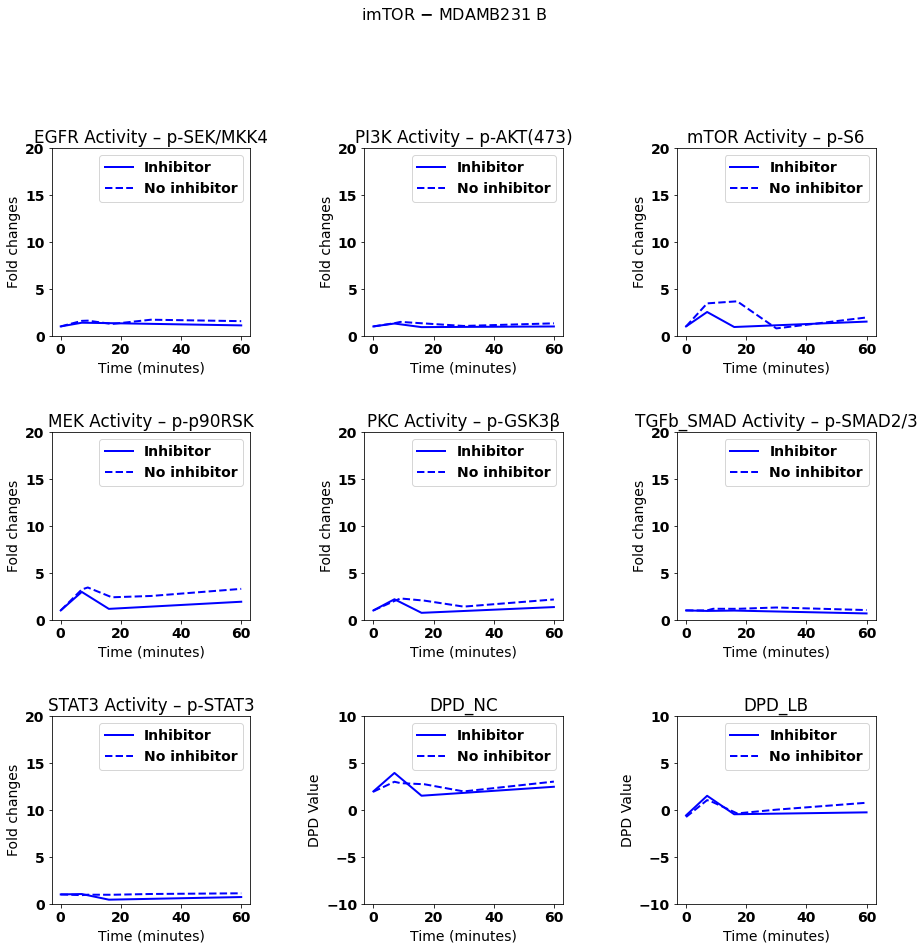

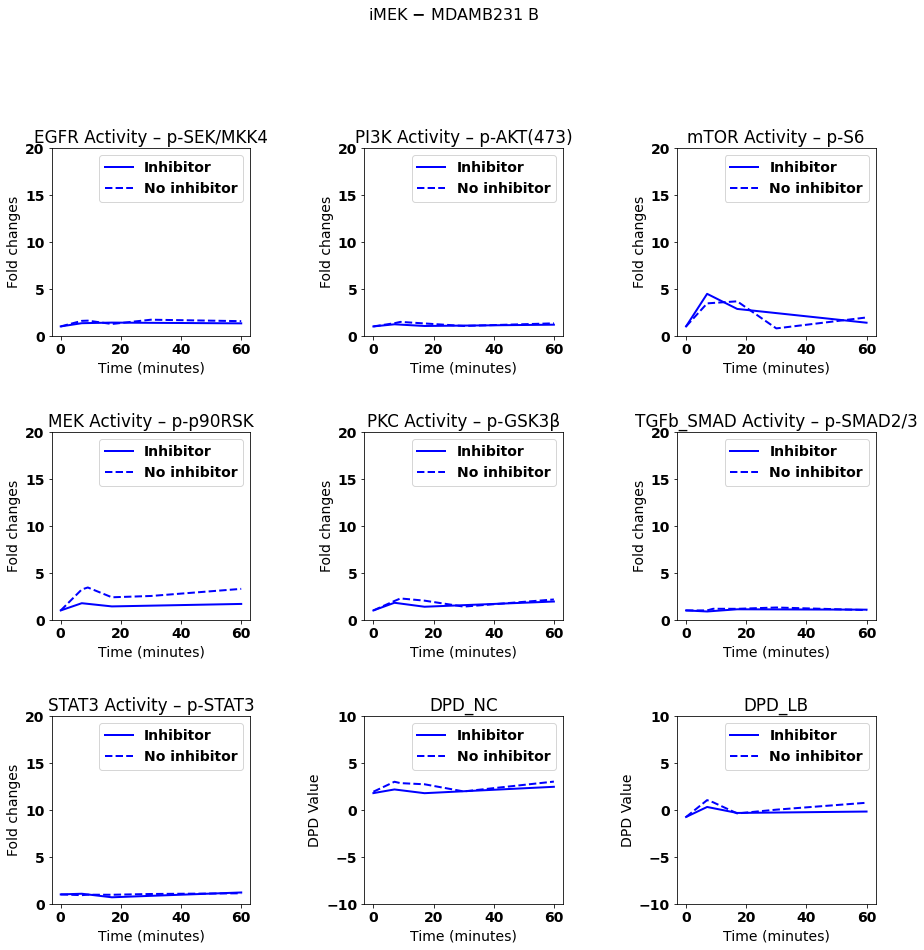

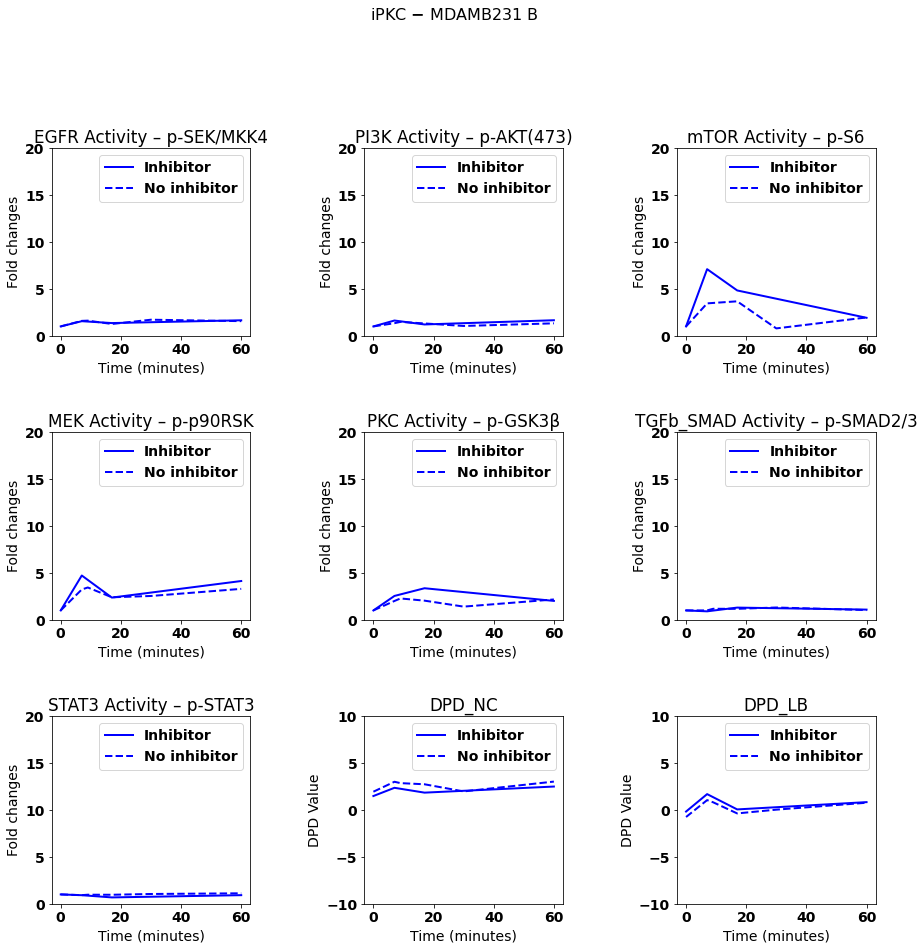

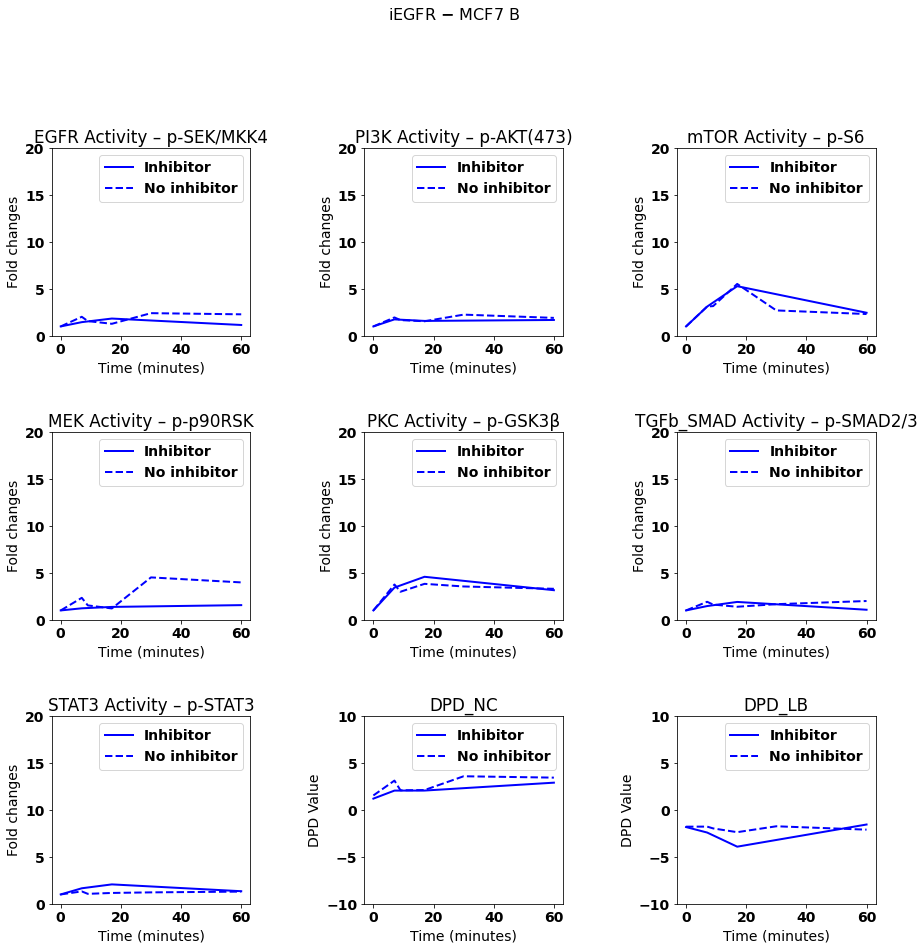

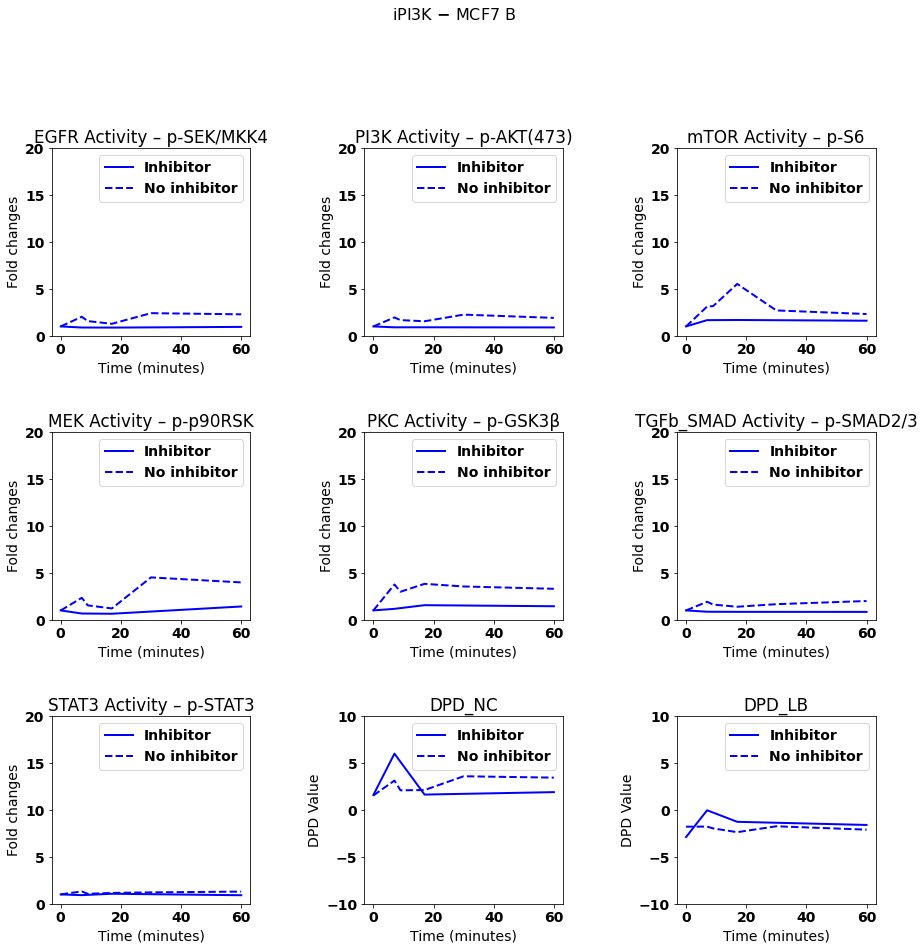

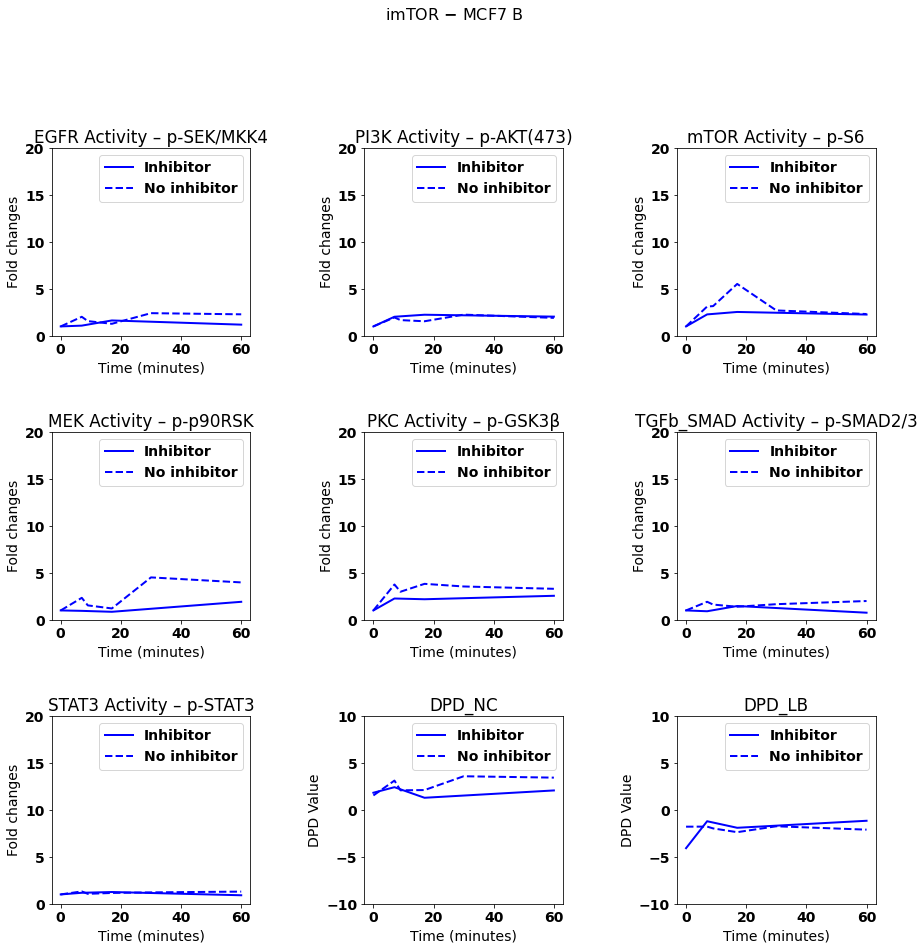

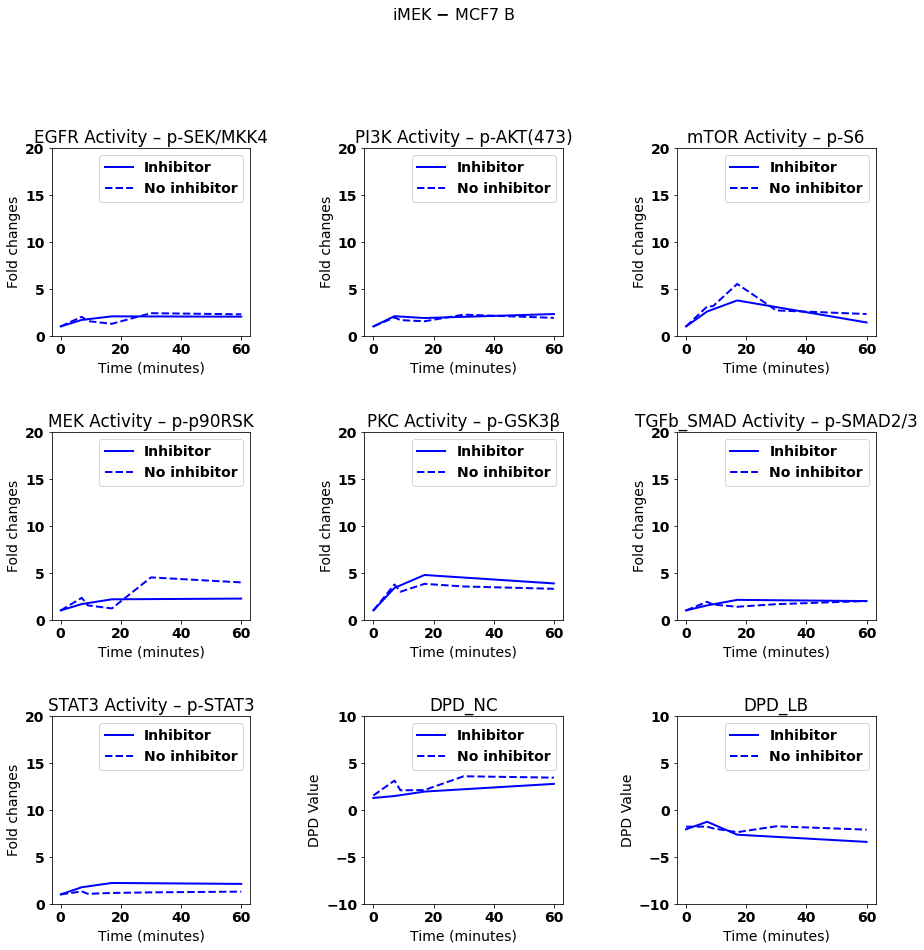

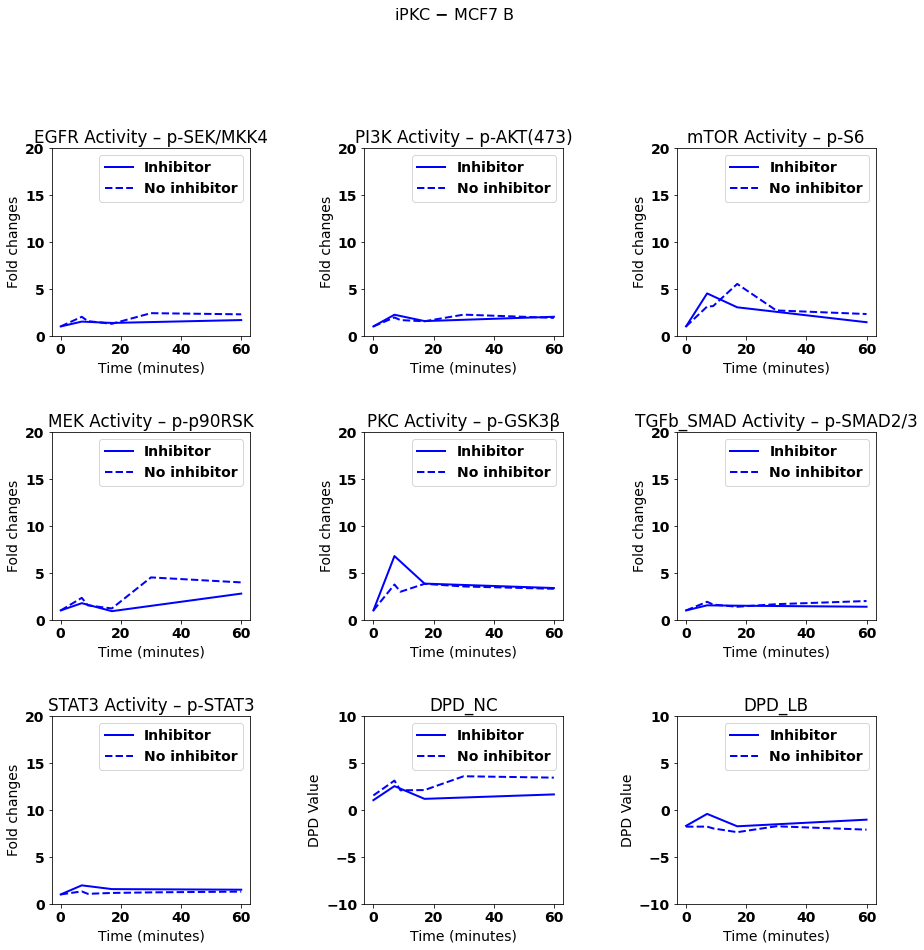

In [40]:
# only keep columns from module_lst
import matplotlib

# COLOR = 'blue'
# matplotlib.rcParams['text.color'] = COLOR
# matplotlib.rcParams['axes.labelcolor'] = COLOR
# matplotlib.rcParams['xtick.color'] = COLOR
# matplotlib.rcParams['ytick.color'] = COLOR


def plot_fold_changes(line, lrepl, grepl):
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

    matplotlib.rc('font', **font)


    df_exp = df_copy.drop(columns=[col for col in df_copy.columns if col not in output_lst+["cell_line", "time", "treatment", "line_replicate", "group_replicate"]])
    df_exp = df_exp[df_exp.cell_line == line]
    # display(df_exp)
    df_exp = df_exp[df_exp.line_replicate == lrepl]
    df_exp = df_exp[df_exp.group_replicate == str(grepl)]
    
    df_exp = df_exp.reset_index(drop=True).set_index("cell_line")
   
    # display(df_exp)
    # df_exp = df_exp.set_index("cell_line")

    df_exp_og = df_copy.drop(columns=[col for col in df_copy.columns if col in output_lst and col != "cell_line"])
    df_exp_og = df_exp_og[df_exp_og.cell_line == line]
    df_exp_og = df_exp_og[df_exp_og.line_replicate == str(lrepl)]
    df_exp_og = df_exp_og[df_exp_og.group_replicate == str(grepl)]


    # display(df_exp_og)
    
    df_exp_og = df_exp_og.set_index("cell_line")
    df_exp_og.index += df_exp_og["treatment"] + df_exp_og["time"].astype(str) + df_exp_og["line_replicate"].astype(str) + df_exp_og["group_replicate"].astype(str)
    df_exp.index += df_exp["treatment"] + df_exp["time"].astype(str) + df_exp["line_replicate"].astype(str) + df_exp["group_replicate"].astype(str)
    # display(df_exp)

    df_exp["DPD_LB"] = df_exp.apply(calculate_dpd, args=(df_exp_og.drop(["treatment", "time", "p-AKT(308)","line_replicate", "group_replicate", "p-MEK1/2"], axis=1), H_LB_MOD, composite_vec_mod["LB_STV_mod"], composite_vec_mod["Norm_LB_mod"]), axis=1)
    df_exp["DPD_NC"] = df_exp.apply(calculate_dpd, args=(df_exp_og.drop(["treatment", "time", "p-AKT(308)", "p-MEK1/2", "line_replicate", "group_replicate"],axis=1), H_CANC_MOD, composite_vec_mod["Canc_STV_mod"], composite_vec_mod["Norm_Canc_mod"]), axis=1)

    # display(df_exp_og)
    module_graph_lst = []

    # figure, axis = plt.subplots(5, 5)
    # set figure size to 20x20

    for pert in perts_lst:
        # plt.figure(figsize=(10,10))
        fig, axs = plt.subplots(3, 3, figsize=(14,14))
        fig.suptitle(pert + " $-$ " + line + " B", fontsize=16)
        fig.tight_layout(pad=5)
        
        for module in module_lst:
            i1 = module_lst.index(module) // 3
            i2 = module_lst.index(module) % 3

            try:
                data_fold_df = (df_exp.drop(columns=[col for col in df_exp.columns if col not in [module_dict[module], "cell_line", "time", "treatment", "line_replicate", "group_replicate"]]))
                #display(data_fold_df)

            except:
                data_fold_df = (df_exp.drop(columns=[col for col in df_exp.columns if col not in [module, "cell_line", "time", "treatment", "line_replicate", "group_replicate"]]))
            
            data_fold_df = data_fold_df[data_fold_df.treatment == pert]


            # display(data_fold_df)
            # x_vals = sorted(list(data_fold_df.time))
            # # map xvals to float
            # x_vals = list(map(float, x_vals))

            data_fold_df.sort_values(by="time", inplace=True)
            # map x_vals to float
            x_vals = list(map(float, list(data_fold_df.time)))
            print(x_vals)
            x_vals.sort()
            # print(x_vals)

            try:
                y_vals = data_fold_df[module_dict[module]]
                axs[i1, i2].plot(x_vals, [y_val/y_vals[0] for y_val in y_vals], label="Inhibitor", linewidth=2, color="blue")  
         
            except:
                y_vals = data_fold_df[module]
                axs[i1, i2].plot(x_vals, y_vals, label="Inhibitor", linewidth=2, color="blue")  

            
                        
            try:
                data_fold_egf = (df_exp.drop(columns=[col for col in df_exp.columns if col not in [module_dict[module], "cell_line", "time", "treatment", "line_replicate", "group_replicate"]]))
        
            except:
                data_fold_egf = (df_exp.drop(columns=[col for col in df_exp.columns if col not in [module, "cell_line", "time", "treatment", "line_replicate", "group_replicate"]]))
            

            data_fold_egf = data_fold_egf[data_fold_egf.treatment == "egf"]
            data_fold_egf = data_fold_egf[data_fold_egf.line_replicate == str(lrepl)]
            data_fold_egf = data_fold_egf[data_fold_egf.group_replicate == str(grepl)]
            
            data_fold_egf.sort_values(by="time", inplace=True)
            x_vals_egf = data_fold_egf.time
            # display(x_vals_egf)
            x_vals_egf = list(map(float, x_vals_egf))
            x_vals_egf.sort()
            # print(x_vals_egf)
            # display(data_fold_egf)

            # display(data_fold_egf)
            # display(list(data_fold_egf.time))

            # x_vals_egf = sorted(list(data_fold_egf.time))
            # map xvals to float
            # x_vals_egf = list(map(float, x_vals_egf))


            try:
                y_vals_egf = data_fold_egf[module_dict[module]]
                axs[i1, i2].plot(x_vals_egf, [y_val_egf/y_vals_egf[0] for y_val_egf in y_vals_egf], "--", label="No inhibitor", linewidth=2, color="blue")

            except:
                y_vals_egf = data_fold_egf[module]
                axs[i1, i2].plot(x_vals_egf, y_vals_egf, "--", label="No inhibitor", linewidth=2, color="blue")
            
            axs[i1, i2].legend()
            
            try:
                axs[i1, i2].set_title(module + " Activity – " + module_dict[module])
                axs[i1, i2].set_xlabel("Time (minutes)")
                axs[i1, i2].set_ylabel("Fold changes")
                axs[i1, i2].set_ylim([0,20])

            except:
                axs[i1, i2].set_title(module)
                axs[i1, i2].set_ylim([-10,10])              
                axs[i1, i2].set_xlabel("Time (minutes)")
                axs[i1, i2].set_ylabel("DPD Value")

        # axs.itle(pert)
        # plt.ylim([-1,8])
        plt.savefig(f"plots/{pert}_{line}.png")    
        # plt.show()
        # try:
        #     os.mkdir("plots/")
        # except:
        #     pass

# os.mkdir("plots")
for line in ["MCF10A", "MDAMB231", "MCF7"]:
# for line in list(df_copy.cell_line.unique()):
    plot_fold_changes(line, "B", 3)
plt.show()


In [41]:
mod_full_df.columns.name = "Cell Line"
mod_full_df

html = mod_full_df[[col for col in mod_full_df.columns[:13]]].head(15).style.set_caption("Portion of Single Cell Proteomic Dataset").background_gradient("inferno").render()
#export high quality image
html += """
<style>
#T_b1684 {
background-color: #234;
}
</style>
"""
print(html)
imgkit.from_string(html, 'styled_dataset.png')

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1351/3910487666.py:4: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



<style type="text/css">
#T_9ddd4_row0_col0, #T_9ddd4_row8_col10 {
  background-color: #390963;
  color: #f1f1f1;
}
#T_9ddd4_row0_col1 {
  background-color: #ef6e21;
  color: #f1f1f1;
}
#T_9ddd4_row0_col2, #T_9ddd4_row1_col5, #T_9ddd4_row1_col10, #T_9ddd4_row2_col12 {
  background-color: #f5db4c;
  color: #000000;
}
#T_9ddd4_row0_col3, #T_9ddd4_row0_col6 {
  background-color: #fcb216;
  color: #000000;
}
#T_9ddd4_row0_col4 {
  background-color: #fbb61a;
  color: #000000;
}
#T_9ddd4_row0_col5 {
  background-color: #fcb014;
  color: #000000;
}
#T_9ddd4_row0_col7, #T_9ddd4_row0_col11, #T_9ddd4_row1_col2, #T_9ddd4_row1_col3, #T_9ddd4_row1_col4, #T_9ddd4_row1_col12, #T_9ddd4_row2_col1, #T_9ddd4_row2_col5, #T_9ddd4_row2_col6, #T_9ddd4_row2_col8, #T_9ddd4_row2_col9, #T_9ddd4_row3_col10, #T_9ddd4_row4_col12, #T_9ddd4_row9_col0 {
  background-color: #fcffa4;
  color: #000000;
}
#T_9ddd4_row0_col8 {
  background-color: #e45a31;
  color: #f1f1f1;
}
#T_9ddd4_row0_col9, #T_9ddd4_row3_col1, #T_9ddd4_

True

In [42]:
def calc_inv_matrices():
    try:
        os.mkdir("inverse_matrices_new")
    except:
        pass
    bmra_files = [f for f in os.listdir("results_BMRA_new") if f.endswith(".csv") and "rm" in f]
    for f in bmra_files:
        df_inv = pd.read_csv(f"results_BMRA_new/{f}")
        for diag in range(9):
            df_inv.iloc[diag, diag] = -1
        
        df_inv = df_inv.to_numpy()
        df_inv = np.matrix(df_inv)
        df_inv = np.linalg.inv(df_inv)
        df_inv = pd.DataFrame(df_inv)
        df_inv.to_csv(f"inverse_matrices_new/inv_{f}", index=False)
        print(f"inverse_matrices_new/inv_{f}")
calc_inv_matrices()

inverse_matrices_new/inv_HCC2185_B_7_rm.csv
inverse_matrices_new/inv_HCC1187_B_60_rm.csv
inverse_matrices_new/inv_MDAMB453_B_7_rm.csv
inverse_matrices_new/inv_HCC1569_B_17_rm.csv
inverse_matrices_new/inv_MDAMB175VII_B_60_rm.csv
inverse_matrices_new/inv_T47D_A_9_rm.csv
inverse_matrices_new/inv_BT20_B_7_rm.csv
inverse_matrices_new/inv_MDAMB415_A_13_rm.csv
inverse_matrices_new/inv_MDAMB157_A_0_rm.csv
inverse_matrices_new/inv_MCF12A_B_17_rm.csv
inverse_matrices_new/inv_EFM192A_A_13_rm.csv
inverse_matrices_new/inv_HCC1419_A_0_rm.csv
inverse_matrices_new/inv_HDQP1_B_60_rm.csv
inverse_matrices_new/inv_MDAMB134VI_A_40_rm.csv
inverse_matrices_new/inv_HCC1954_A_40_rm.csv
inverse_matrices_new/inv_HCC1187_A_0_rm.csv
inverse_matrices_new/inv_HCC1937_A_13_rm.csv
inverse_matrices_new/inv_Hs578T_A_13_rm.csv
inverse_matrices_new/inv_184A1_A_9_rm.csv
inverse_matrices_new/inv_ZR75B_B_7_rm.csv
inverse_matrices_new/inv_EVSAT_A_9_rm.csv
inverse_matrices_new/inv_MDAMB436_A_0_rm.csv
inverse_matrices_new/inv_M

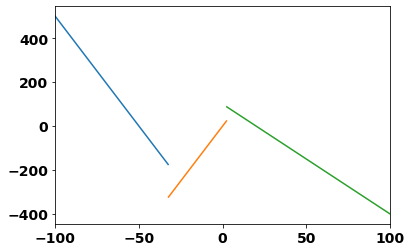

In [43]:
def plot_dpd_eqs():
    s_vals = np.linspace(-100,100, 1000)
    svals1 = []
    svals2 = []
    svals3 = []

    neg_pot1 = []
    neg_pot2 = []
    neg_pot3 = []

    s_l = -50
    s_b = 20
    # add slider for alphas
    alpha1 = -10
    alpha2 = -alpha1
    alpha3 = alpha1
    
    for s in s_vals:
        if s < (3*s_l + s_b)/4:
            svals1.append(s)
            neg_pot1.append(alpha1*(s - s_l))
        elif s > (3*s_b + s_l)/4:
            svals3.append(s)
            neg_pot3.append(alpha3*(s - s_b)/2)
        else:
            svals2.append(s)
            neg_pot2.append(alpha2*s)

    # set ylim
    plt.xlim([-100, 100])
    plt.plot(svals1, neg_pot1)
    plt.plot(svals2, neg_pot2)
    plt.plot(svals3, neg_pot3)

plot_dpd_eqs()

In [44]:
# inh_vec = [1.57e-9, 1.08e-6, 1.7e-6, 3.9e-6, 0.5e-6,0.01e-6]
# import numpy as np
# from scipy import linalg
# # normalize inh_vec
# inh_vec = np.array(inh_vec)/max(inh_vec)

In [45]:
# composite_dpd_mod_full.loc["BT474_full_full_A"]

In [46]:

def create_consensus_lines(type_consensus):
    if type_consensus == "rm":
        consensus_lines = os.listdir("consensus_new_rm")
    else:
        consensus_lines = os.listdir("consensus_new")


    # consensus_lines = [f for f in consensus_lines if "rm" in f]
    print(consensus_lines)

    luminal_consensus_lines = []
    basal_consensus_lines = []
    normal_consensus_lines = []

    for con_line in consensus_lines:
        if type_consensus == "rm":
            conn_df = pd.read_csv(f"consensus_new_rm/{con_line}")
        else:
            conn_df = pd.read_csv(f"consensus_new/{con_line}")


        if con_line.split("_")[1] in luminal_cell_names:
            luminal_consensus_lines.append(conn_df)
        elif con_line.split("_")[1] in basal_cell_names:
            basal_consensus_lines.append(conn_df)
        elif con_line.split("_")[1] in normal_cell_names:
            normal_consensus_lines.append(conn_df)

    # get mean of luminal_consensus
    luminal_consensus = pd.concat(luminal_consensus_lines)
    if(type_consensus == "rm"):
        luminal_consensus = luminal_consensus.groupby(luminal_consensus.index).mean()
    else:
        luminal_consensus = luminal_consensus.groupby(luminal_consensus.index).mean()

    luminal_consensus.to_csv(f"consensus_new_rm/luminal_consensus_{type_consensus}.csv")

    basal_consensus = pd.concat(basal_consensus_lines)
    if(type_consensus == "rm"):
        basal_consensus = basal_consensus.groupby(basal_consensus.index).mean()
    else:
        basal_consensus = basal_consensus.groupby(basal_consensus.index).mean()

    basal_consensus.to_csv(f"consensus_new_rm/basal_consensus_{type_consensus}.csv")

    normal_consensus = pd.concat(normal_consensus_lines)
    if(type_consensus == "rm"):
        normal_consensus = normal_consensus.groupby(normal_consensus.index).mean()
    else:
        normal_consensus = normal_consensus.groupby(normal_consensus.index).mean()
        
    normal_consensus.to_csv(f"consensus_new_rm/normal_consensus_{type_consensus}.csv")


    
    # lum_cell_dev = []
    # basal_cell_dev = []
    # normal_cell_dev = []
    # # iterate over luminal_cells and find one which least deviates from luminal_consensus
    # for lum_cell in luminal_consensus:
    
    #     lum_cell_dev.append(np.linalg.norm(luminal_consensus - lum_cell))
    # for basal_cell in basal_consensus:
    #     basal_cell_dev.append(np.linalg.norm(basal_consensus - basal_cell))
    # for normal_cell in normal_consensus:
    #     normal_cell_dev.append(np.linalg.norm(normal_consensus - normal_cell))

    # print(min(lum_cell_dev))
    # print(min(basal_cell_dev))
    # print(min(normal_cell_dev))

        




    # return (luminal_consensus, basal_consensus, normal_consensus)
create_consensus_lines("rm")
create_consensus_lines("Am")   





        # read in rm for each 

['consensus_HCC202_A_rm.csv', 'basal_consensus_rm.csv', 'consensus_CAL851_A_rm.csv', 'consensus_HCC1395_A_rm.csv', 'consensus_MDAMB175VII_A_rm.csv', 'consensus_HCC1143_A_rm.csv', 'consensus_HCC1954_A_rm.csv', 'consensus_MCF7_A_rm.csv', 'consensus_HCC1428_A_rm.csv', 'normal_consensus_rm.csv', 'consensus_HCC1569_A_rm.csv', 'consensus_BT474_A_rm.csv', 'consensus_HBL100_A_rm.csv', 'consensus_HDQP1_A_rm.csv', 'consensus_MDAMB231_A_rm.csv', 'consensus_BT549_A_rm.csv', 'consensus_MCF10F_A_rm.csv', 'luminal_consensus_rm.csv', 'consensus_UACC812_A_rm.csv', 'consensus_HCC2218_A_rm.csv', 'basal_consensus_Am.csv', 'consensus_MCF10A_A_rm.csv', 'luminal_consensus_Am.csv', 'consensus_HCC2185_A_rm.csv', 'consensus_KPL1_A_rm.csv', 'consensus_MFM223_A_rm.csv', 'consensus_BT20_A_rm.csv', 'consensus_MDAMB361_A_rm.csv', 'consensus_MDAMB453_A_rm.csv', 'consensus_CAL148_A_rm.csv', 'normal_consensus_Am.csv', 'consensus_EFM192A_A_rm.csv', 'consensus_MACLS2_A_rm.csv', 'luminal_consensus_rm.tex', 'consensus_MDAM

In [121]:
# read in consensus for rm
total_cells = len(luminal_cell_names) + len(basal_cell_names) + len(normal_cell_names)

luminal_consensus_rm_df = pd.read_csv("consensus_new_rm/luminal_consensus_rm.csv")
luminal_consensus_rm_df = luminal_consensus_rm_df.loc[:, ~luminal_consensus_rm_df.columns.str.contains('^Unnamed')]
luminal_consensus_rm_df.columns

basal_consensus_rm_df = pd.read_csv("consensus_new_rm/basal_consensus_rm.csv")
basal_consensus_rm_df = basal_consensus_rm_df.loc[:, ~basal_consensus_rm_df.columns.str.contains('^Unnamed')]
basal_consensus_rm_df.columns

normal_consensus_rm_df = pd.read_csv("consensus_new_rm/normal_consensus_rm.csv")
normal_consensus_rm_df = normal_consensus_rm_df.loc[:, ~normal_consensus_rm_df.columns.str.contains('^Unnamed')]
normal_consensus_rm_df.columns


# read in consensus for Am
luminal_consensus_Am_df = pd.read_csv("consensus_new_rm/luminal_consensus_Am.csv")
luminal_consensus_Am_df = luminal_consensus_Am_df.loc[:, ~luminal_consensus_Am_df.columns.str.contains('^Unnamed')]
luminal_consensus_Am_df.columns
luminal_consensus_Am_df.index = luminal_consensus_Am_df.columns

# round to zero if values < 0.25
# luminal_consensus_Am_df = luminal_consensus_Am_df.mask(luminal_consensus_Am_df < 1/len(luminal_cell_names), 0)
# else round to one
# luminal_consensus_Am_df = luminal_consensus_Am_df.mask(luminal_consensus_Am_df >= 1/len(luminal_cell_names), 1)


basal_consensus_Am_df = pd.read_csv("consensus_new_rm/basal_consensus_Am.csv")
basal_consensus_Am_df = basal_consensus_Am_df.loc[:, ~basal_consensus_Am_df.columns.str.contains('^Unnamed')]
basal_consensus_Am_df.columns
basal_consensus_Am_df.index = basal_consensus_Am_df.columns
# round to zero if values < 0.25
# basal_consensus_Am_df = basal_consensus_Am_df.mask(basal_consensus_Am_df < 1/len(basal_cell_names), 0)
# else round to one
# basal_consensus_Am_df = basal_consensus_Am_df.mask(basal_consensus_Am_df >= 1/len(basal_cell_names), 1)
display(basal_consensus_Am_df)
display(luminal_consensus_Am_df)

normal_consensus_Am_df = pd.read_csv("consensus_new_rm/normal_consensus_Am.csv")
normal_consensus_Am_df = normal_consensus_Am_df.loc[:, ~normal_consensus_Am_df.columns.str.contains('^Unnamed')]
normal_consensus_Am_df.columns
# round to zero if values < 0.25
# normal_consensus_Am_df = normal_consensus_Am_df.mask(normal_consensus_Am_df < 1/len(normal_cells), 0)
# else round to one
# normal_consensus_Am_df = normal_consensus_Am_df.mask(normal_consensus_Am_df >= 1/len(normal_cells), 1)
normal_consensus_Am_df.index = normal_consensus_Am_df.columns

print(luminal_consensus_rm_df)

luminal_consensus_rm_df.to_latex("consensus_new_rm/luminal_consensus_rm.tex")

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
EGFR,0.000000,0.890110,0.961538,1.000000,0.923077,1.000000,0.043956,0.0,0.0
PI3K_AKT,1.000000,0.000000,0.890110,0.961538,0.082418,1.000000,0.961538,0.0,0.0
mTOR,0.170330,0.895604,0.000000,0.923077,1.000000,0.357143,0.126374,0.0,0.0
MEK_ERK,1.000000,0.923077,0.890110,0.000000,0.049451,1.000000,1.000000,0.0,0.0
PKC,0.928571,0.554945,0.104396,0.093407,0.000000,0.137363,0.076923,0.0,0.0
TGFb-SMAD,0.895604,0.021978,0.148352,0.851648,0.005495,0.000000,0.483516,0.0,0.0
STAT3,0.928571,0.170330,0.236264,0.934066,0.263736,0.719780,0.000000,0.0,0.0
DPD_NC,0.000000,0.884615,0.818681,0.923077,0.928571,0.961538,0.928571,0.0,0.0
DPD_LB,0.000000,0.967033,0.961538,1.000000,1.000000,1.000000,1.000000,0.0,0.0


,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
EGFR,0.000000,0.838710,0.806452,0.967742,0.811060,1.000000,0.032258,0.0,0.0
PI3K_AKT,1.000000,0.000000,0.907834,1.000000,0.460829,0.967742,1.000000,0.0,0.0
mTOR,0.364055,0.940092,0.000000,0.940092,1.000000,0.400922,0.142857,0.0,0.0
MEK_ERK,1.000000,0.778802,0.843318,0.000000,0.036866,1.000000,1.000000,0.0,0.0
PKC,0.917051,0.525346,0.285714,0.175115,0.000000,0.147465,0.202765,0.0,0.0
TGFb-SMAD,0.972350,0.064516,0.078341,0.732719,0.069124,0.000000,0.387097,0.0,0.0
STAT3,0.944700,0.110599,0.036866,0.843318,0.152074,0.506912,0.000000,0.0,0.0
DPD_NC,0.000000,0.935484,0.815668,0.935484,0.907834,1.000000,1.000000,0.0,0.0
DPD_LB,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


       EGFR  PI3K_AKT      mTOR   MEK_ERK       PKC  TGFb-SMAD     STAT3  \
0  0.000000  0.081863 -0.004405  0.320720 -0.060614   0.312762  0.001874   
1  0.676291  0.000000 -0.041511 -0.164698  0.102252  -0.088824  0.041004   
2 -0.052027  0.469960  0.000000  0.239796  0.468396  -0.091603 -0.047275   
3  0.496748  0.090848  0.059560  0.000000  0.006463   0.038004  0.158893   
4  0.354578  0.173724  0.047524  0.009243  0.000000   0.032286  0.051062   
5  0.390417 -0.007701 -0.010764  0.027363 -0.007255   0.000000  0.181232   
6  0.216813  0.030612  0.011790  0.094330  0.041414   0.238495  0.000000   
7  0.000000 -0.063005  0.010046  0.506627  0.012206  -0.131302  0.330873   
8  0.000000  0.816787  0.244646  0.258514 -1.901092  -2.864322  1.685282   

   DPD_NC  DPD_LB  
0     0.0     0.0  
1     0.0     0.0  
2     0.0     0.0  
3     0.0     0.0  
4     0.0     0.0  
5     0.0     0.0  
6     0.0     0.0  
7     0.0     0.0  
8     0.0     0.0  


/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1351/3794845669.py:51: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [48]:
# plot_network("MDAMB231", basal_consensus_rm_df, basal_consensus_Am_df, weight_coef=6)

In [49]:
# canc_consensus_Am_df = (basal_consensus_Am_df + luminal_consensus_Am_df)
# canc_consensus_rm_df = (basal_consensus_rm_df + luminal_consensus_rm_df)
# canc_consensus_rm_df = canc_consensus_rm_df.set_index("module")
# canc_consensus_Am_df = canc_consensus_Am_df.set_index("module")
# canc_consensus_Am_df = canc_consensus_Am_df.mul(0.5)
# canc_consensus_rm_df = canc_consensus_rm_df.mul(0.5)
# display(canc_consensus_Am_df)
# display(canc_consensus_rm_df)

# plot_network("MDAMB231", canc_consensus_rm_df, canc_consensus_Am_df, weight_coef=6)

In [50]:
composite_dpd_mod_full.loc["MDAMB231_full_full_A"]

Normal/Cancer DPD    1.740436
Luminal/Basal DPD    0.868796
Name: MDAMB231_full_full_A, dtype: object

In [51]:
# plot_network("BT474", weight_coef=6)

In [52]:
composite_dpd_mod_full.loc["MCF10A_full_full_A"]

Normal/Cancer DPD   -0.614056
Luminal/Basal DPD     1.24652
Name: MCF10A_full_full_A, dtype: object

In [53]:
# composite_dpd_mod_full.to_csv("composite_dpd_mod_full.csv")
# time_map

In [181]:
# begin MRA analysis
# generate consensus of MDAMB231 by averaging across all MDAMB231 timepoints that are good

def calc_good_consensus(line):
    lst_avg = []
    timepoints_good = [9,13,17,40]
    for t in timepoints_good:
        if t in [9,13,40]:
            replicate = "A"
        else:
            replicate = "B"

        consensus_good = pd.read_csv(f"results_BMRA_new/{line}_{replicate}_{t}_rm.csv")
        lst_avg.append(consensus_good)

    return sum(lst_avg) / len(timepoints_good)



mdamb231_consensus = calc_good_consensus("MDAMB231")
mcf10a_consensus = calc_good_consensus("MCF10A")
mcf7_consensus = calc_good_consensus("MCF7")

# display((basal_consensus_rm_df - mdamb231_consensus).round(2))
# display((luminal_consensus_rm_df - mcf7_consensus).round(2))
# display((normal_consensus_rm_df - mcf10a_consensus).round(2))


from sklearn.preprocessing import normalize
# create dataframe where index are cell lines and columns are drugs
# df = pd.DataFrame(index=, columns=perts_lst)

# load in connection coefficients
# conn_coef_mcf10a = pd.read_csv("results_BMRA_new/MDAMB231_A_0_rm.csv")
def calc_drug_resp(line, drug):
    # for mod in module_lst:
    #     print(mod)

    r_inv = line.to_numpy()
    # print(r_inv)
    np.fill_diagonal(r_inv, -1)
    # # calculate inverse of r_inv
    r_inv = np.linalg.inv(r_inv)
    # id = np.zeros((5,9))
    # for i in range(5):
    #         id[i][i] = -1
    
    inh = np.array([-1 if i in drug else 0 for i in module_lst])
    res = (-1 * np.matmul(r_inv, inh))
    # print(inh)
    # print(res)
    # # convert res to dataframe
    res = pd.DataFrame(res, columns=[f"Effect of Inhibitors {','.join([i for i in drug])}"], index=module_lst)
    res.index.name = "Module"
    return res


# os.mkdir("tex_files")

mdmamb231_40_line = pd.read_csv("results_BMRA_new/MDAMB231_A_40_rm.csv")
# display(mdmamb231_40_line)
calc_drug_resp(mdmamb231_40_line, ["mTOR", "MEK"]).round(3).to_latex("tex_files/MDAMB231_drug.tex")
mcf10a_40_line = pd.read_csv("results_BMRA_new/MCF10A_A_40_rm.csv")
calc_drug_resp(mcf10a_40_line, ["EGFR", "MEK", "PKC"]).round(3).to_latex("tex_files/MCF10A_drug.tex")
mcf7_60_line = pd.read_csv("results_BMRA_new/MCF7_B_60_rm.csv")
calc_drug_resp(mcf7_60_line, ["mTOR", "PI3K"]).to_latex("tex_files/MCF7_drug.tex")

mdamb157_60_line = pd.read_csv("results_BMRA_new/MDAMB157_A_13_rm.csv")
display(mdamb157_60_line)


# calc_drug_resp(mcf10a_consensus, ["EGFR"])
# calc_drug_resp(mcf10a_consensus).round(3).to_latex("tex_files/MCF10A_drug.tex")
# calc_drug_resp(mcf7_consensus).round(3).to_latex("tex_files/MCF7_drug.tex")

# def convert_drug_resp_to_latex(drug_resp):
#     # convert matrix of perts_lst * module_lst to latex table
#     f_latex = open("drug_resp.tex", "w")
#     f_latex.write("\\begin{table}[h]\}")
#     f_latex.write("\\centering")



# convert_drug_resp_to_latex(mdamb231_consensus)



# tgfb_lst = []
# for i in perts_lst:
#     lst = calc_drug_resp(i)
#     for j in range(len(module_lst)):
#         print(module_lst[j], lst[j], i)
#     print("\n")
    # tgfb_lst.append(lst[-4])
    # print(lst[-4], i)

# max(tgfb_lst)

# Rxl = pd.read_csv(f"RAW/184A1_A_40.csv")
# Rxl.shape

           Effect of Inhibitors mTOR,MEK,PI3K
Module                                       
EGFR                                   -0.000
PI3K                                   -1.002
mTOR                                   -2.077
MEK                                     0.329
PKC                                    -0.000
TGFb_SMAD                              -0.000
STAT3                                   0.000
DPD_NC                                  0.015
DPD_LB                                  0.672


In [182]:
def get_dataframe_plot(name, t, csv_filename, df_already=None):
    # os.mkdir("plots_latex_network")
    if df_already is None:
        df_to_plot = pd.read_csv(csv_filename)
    else:
        df_to_plot = df_already
        
    df_to_plot_sd = pd.read_csv(csv_filename[:-7] + "_rs.csv")
    df_to_plot_sd.index = df_to_plot_sd.columns
    df_to_plot.index = df_to_plot.columns
    # display(df_to_plot_sd)

    for i in range(9):
        df_to_plot.iloc[i][i] = -1
    # display(df_to_plot)
    df_to_plot = df_to_plot.round(3)
    df_to_plot.replace(0, int(0), inplace=True)
    modules_plot_dict = {
        "EGFR": [],
        "PI3K_AKT": [],
        "mTOR" : [],
        "MEK_ERK" : [],
        "PKC" : [],
        "TGFb-SMAD" : [],
        "STAT3" : [],
        "DPD_NC" : [],
        "DPD_LB" : []
    }

    # iterate over each row
    for i in df_to_plot.iterrows():
        rij_row = list(i[1])
        rij_row[list(modules_plot_dict.keys()).index(i[0])] = -1
        modules_plot_dict[i[0]] = rij_row

    
    f_latex = open(f"plots_latex_network/{name + '_' + str(t)}", "w")
    f_latex.write("\\begin{table}[h]\n")
    f_latex.write("\\caption{\\textbf{Local Response Matrix for " + name  + " at " + str(t) + " Minutes " "}}\n")
    f_latex.write("\\centering\n")
    f_latex.write("\\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}\n")
    f_latex.write("\\hline\n")
    f_latex.write("\\toprule\n")
    # f_latex.write("\\textbf{Modules} & EGFR & PI3K\_AKT & mTOR & MEK\_ERK & PKC & TGFb-SMAD & STAT3 & DPD\_NC & DPD\_LB \\\\ \n")
    f_latex.write("\\textbf{Modules} & EGFR & PI3K\_AKT & mTOR & MEK\_ERK & PKC & TGFb-SMAD & STAT3 \\\\ \n")
    f_latex.write("\\hline\n")
    f_latex.write("\\midrule\n")
    for i in modules_plot_dict:
        row_sd = df_to_plot_sd.loc[i]
        # display(row_sd)
        module_name = i.replace("_", "\\_")
        f_latex.write(f"{module_name} & ")
        for j_ind, j in enumerate(modules_plot_dict[i][:-2]):
            val_sd = row_sd.iloc[j_ind]
            if j_ind != len(modules_plot_dict[i]) - 3:
                if val_sd != 0:
                    f_latex.write(f"{j} & ")
                else:
                    f_latex.write(f"{j} & ")
            else:
                f_latex.write(f"{j}")

        f_latex.write("\\\\\n")
        f_latex.write("\\hline\n")
    f_latex.write("\\bottomrule\n")
    f_latex.write("\\end{tabular}\n")
    f_latex.write("\\end{table}\n")
    f_latex.close()
 
        # modules_plot_dict["EGFR"] = i["EGFR"]


    # df_to_plot.to_latex(f"plots_latex_network/{name + '_' + str(t)}")

# for t in [7,17,60]:
    # get_dataframe_plot("MDAMB231", t, f"results_BMRA_new/MDAMB231_B_{t}_rm.csv")
display(pd.read_csv(f"results_BMRA_new/MDAMB231_B_{7}_rs.csv"))
# get_dataframe_plot("MCF7", 13, f"results_BMRA_new/MCF10A_B_60_rm.csv")
# disp

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
0,0.000000,0.472862,0.473708,0.470602,0.470121,0.475703,0.000000,0,0
1,0.524231,0.000000,0.510108,0.514126,0.004159,0.553606,0.556302,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0.484578,0.489328,0.490940,0.000000,0.000000,0.482584,0.491884,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
5,0.258600,0.000000,0.000000,0.257310,0.000000,0.000000,0.000000,0,0
6,0.300819,0.000000,0.000000,0.299963,0.000000,0.000000,0.000000,0,0
7,0.000000,0.410952,0.435122,0.429405,0.428833,0.429119,0.430240,0,0
8,0.000000,0.449607,0.448652,0.449934,0.449524,0.447806,0.448910,0,0


In [57]:
luminal_cells

,p-CREB,p-STAT5,p-SRC,p-FAK,p-MEK1/2,p-MAPKAPK-2,p-S6K,p-MAP2K3,p-p53,p-p38,...,β-CATENIN,p-STAT3,p-SAPK/JNK,Ki-67,p-S6,cleaved PARP,p-SEK/MKK4,p-AKT(308),p-RB,p-4EBP1
index,,,,,,,,,,,,,,,,,,,,,
AU565,0.800159,0.479879,0.265509,0.462305,0.983225,0.619865,1.455092,0.881529,7.370715,0.332803,...,0.410092,0.096725,0.647177,0.550739,3.612563,0.219317,0.664014,0.605233,3.057395,0.586415
AU565,1.451617,0.453849,0.237776,0.477441,1.009945,0.790473,1.702946,1.151257,8.560815,0.361090,...,0.524904,0.120843,0.772304,0.812713,3.799611,0.157750,0.873208,0.682518,3.124000,0.914921
BT474,0.471989,0.495145,0.426790,0.738625,0.995406,1.302596,0.787706,0.715043,0.153124,0.340578,...,0.923895,0.076108,0.928200,0.343967,6.682923,0.360532,1.070978,1.332748,2.541264,0.782886
BT474,0.286315,0.521666,0.478600,0.896424,0.938029,1.043103,0.677987,0.564912,0.127851,0.352123,...,0.596349,0.058867,0.607659,0.175972,6.049141,0.260838,0.739122,0.980727,2.033489,0.615072
BT483,0.359488,0.912075,0.771368,0.792686,0.998285,0.752409,1.012467,0.882299,0.383315,0.909840,...,0.789568,2.012027,1.117436,0.852918,2.912123,0.257334,1.224594,1.144516,1.325891,0.865111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZR751,2.811261,1.336929,1.604424,1.574116,1.428825,1.459880,0.973198,1.223841,0.198231,0.627663,...,0.517455,0.602626,0.985517,1.068841,4.406985,0.163593,0.680316,0.839765,7.013346,3.980168
ZR7530,1.395018,0.725107,0.347454,2.004367,0.911035,1.242925,0.903384,0.915399,0.202572,0.270291,...,0.532572,0.111207,0.718604,0.655406,1.919985,0.183004,0.701829,0.639451,2.039215,0.963950
ZR7530,1.374162,0.717612,0.326788,2.062061,0.885543,1.186626,0.900188,0.946460,0.206416,0.258809,...,0.565347,0.103686,0.662450,0.797122,2.660091,0.170750,0.786502,0.623961,2.197921,0.912807


In [58]:
# k_fold_df.to_latex("k_fold.tex")

In [59]:
# read in MDAMB231 consensus network
# mdamb231_consensus_rm_df = pd.read_csv("consensus_new/MDAMB231_A_40_rm.csv")
# plot_network(mdamb231_consensus_rm_df, "MDAMB231", 40, "consensus_new")

In [176]:
resp_for_good_plot = pd.read_csv("results_BMRA_new/MCF10A_A_40_rm.csv")
resp_for_good_plot.index = resp_for_good_plot.columns
resp_for_good_plot.round(2)

# display(pd.read_csv("results_BMRA_new/MCF10A_B_60_rm.csv"))
# display(pd.read_csv("results_BMRA_new/MCF10A_A_40_rm.csv")



,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
EGFR,0.00,0.02,0.02,0.27,0.00,0.74,0.00,0,0
PI3K_AKT,0.64,0.00,-0.30,0.19,0.00,-0.72,0.75,0,0
mTOR,0.00,0.00,0.00,0.38,-0.34,0.00,0.00,0,0
MEK_ERK,2.81,-0.45,-0.41,0.00,-0.01,-1.69,1.25,0,0
PKC,0.58,0.00,0.00,0.00,0.00,1.18,-0.00,0,0
TGFb-SMAD,0.55,0.00,0.00,0.00,0.00,0.00,0.41,0,0
STAT3,-1.19,0.00,0.00,0.00,0.00,2.11,0.00,0,0
DPD_NC,0.00,-0.66,0.00,1.27,0.77,0.70,-0.24,0,0
DPD_LB,0.00,0.00,0.49,-0.18,0.73,-0.23,0.00,0,0


In [61]:
# calculate confidence interval
std = 0.972819
n = 5000
z = 2.58
ci = z * (std / np.sqrt(n))

In [62]:
composite_dpd_mod_full.loc["MCF7_full_full_A"]

Normal/Cancer DPD    1.384023
Luminal/Basal DPD   -0.388423
Name: MCF7_full_full_A, dtype: object

In [135]:
# for line_to_plot in ["MCF10A", "MDAMB231", "MCF7"]:
#     for pert in perts_lst:
#         plot_name = "plots_fold/" + pert + "_" + line_to_plot
#         latex_str = """
#         \\begin{figure}
#         \\includegraphics[scale=0.3]""" + "{" + plot_name + ".png}" + """
#         \\end{figure}
#         """
#         print(latex_str)

In [159]:
# for i in [7,17,60]:
#     dfs = (pd.read_csv(f"results_BMRA_new/CAL120_B_{i}_rm.csv"))
#     dfs.index = dfs.columns
#     display(dfs)

# for i in [9,13,40]:
#     dfs = (pd.read_csv(f"results_BMRA_new/CAL120_A_{i}_rm.csv"))
#     dfs.index = dfs.columns
#     display(dfs)


In [145]:
basal_consensus_Am_df.index = basal_consensus_Am_df.columns
# basal_consensus_Am_df
display(mdamb231_consensus)


,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
0,-1.000000,0.009319,0.055123,0.149631,0.017110,0.272870,0.000000,0.0,0.0
1,0.635168,-1.000000,0.103804,-0.058356,0.000000,-0.066456,0.556900,0.0,0.0
2,0.000000,0.982261,-1.000000,0.000000,0.408722,0.000000,-0.450992,0.0,0.0
3,1.771570,-0.105603,-0.013194,-1.000000,0.000000,-0.536195,0.683297,0.0,0.0
4,1.365944,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.0
6,0.211448,0.000000,-0.087333,0.000000,0.000000,0.410743,-1.000000,0.0,0.0
7,0.000000,-0.006764,0.094806,0.052283,0.157062,0.285784,0.317169,-1.0,0.0
8,0.000000,-0.073700,0.270497,0.697417,-0.376401,0.130323,0.401481,0.0,-1.0


In [150]:
# basal_consensus_rm_df

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
0,0.000000,0.114111,0.007752,0.322613,-0.104101,0.317825,0.006747,0.0,0.0
1,0.306049,0.000000,-0.054571,-0.086367,0.061377,-0.156015,0.204361,0.0,0.0
2,-0.022688,0.077769,0.000000,0.247579,0.557649,-0.122327,-0.097823,0.0,0.0
3,0.722369,0.052161,0.041686,0.000000,0.003819,-0.072303,0.100599,0.0,0.0
4,0.306025,0.186096,0.046286,0.019961,0.000000,0.050446,0.056281,0.0,0.0
5,0.276287,-0.002859,-0.006140,-0.007286,0.005832,0.000000,0.239718,0.0,0.0
6,0.220502,0.005051,-0.000898,-0.128611,-0.002475,0.226647,0.000000,0.0,0.0
7,0.000000,-2.360151,-3.898931,-2.326425,-4.515845,-1.188455,9.800873,0.0,0.0
8,0.000000,1.392647,0.233136,0.753861,-0.452575,1.178922,-0.003379,0.0,0.0


In [156]:
bt549 = pd.read_csv("results_BMRA_new/BT549_A_40_rm.csv")
calc_drug_resp(bt549, ["EGFR", "MEK", "mTOR"]).to_latex("tex_files/BT549_drug.tex")


/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1351/2981053875.py:2: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [162]:
mcf10a_40_line.index = mcf10a_40_line.columns
mcf10a_40_line

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
EGFR,0.000000,0.017118,0.023848,0.273265,0.000122,0.743282,0.000027,0,0
PI3K_AKT,0.638559,0.000000,-0.301864,0.187452,0.000000,-0.715104,0.747871,0,0
mTOR,0.000000,0.000000,0.000000,0.381735,-0.339142,0.000000,0.000000,0,0
MEK_ERK,2.812682,-0.446877,-0.407207,0.000000,-0.011446,-1.687782,1.245578,0,0
PKC,0.582709,0.000000,0.000000,0.000000,0.000000,1.176757,-0.000221,0,0
TGFb-SMAD,0.545527,0.000000,0.000000,0.000000,0.000000,0.000000,0.406844,0,0
STAT3,-1.189410,0.000000,0.000000,0.000000,0.000000,2.112449,0.000000,0,0
DPD_NC,0.000000,-0.655176,0.000000,1.271946,0.774326,0.704253,-0.244190,0,0
DPD_LB,0.000000,0.000000,0.488773,-0.182058,0.725504,-0.226447,0.002046,0,0


In [172]:
mdmamb231_40_line.index = mdmamb231_40_line.columns
mdmamb231_40_line

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
EGFR,0.000000,0.000000,0.000000,0.000000,0.000000,1.145016,0.000000,0,0
PI3K_AKT,0.505697,0.000000,-0.013633,-0.090720,0.000000,0.166285,0.646174,0,0
mTOR,0.000000,1.075169,0.000000,0.000000,0.541240,0.000000,0.000000,0,0
MEK_ERK,2.011669,-1.194716,-0.063980,0.000000,0.000000,-0.916182,2.243119,0,0
PKC,2.497840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
TGFb-SMAD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
STAT3,0.845792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
DPD_NC,0.000000,-0.027056,0.007520,0.011993,0.370988,-0.017433,0.031672,0,0
DPD_LB,0.000000,-0.744935,0.165401,0.816510,-0.314766,1.190279,0.834699,0,0


In [186]:
get_dataframe_plot("hello", 2, "h", basal_consensus_rm_df)

FileNotFoundError: [Errno 2] No such file or directory: '_rs.csv'